                 home_open  visiting_open
Game_ID                                  
20100404BOSNYY1       -114           -106
20100405WASPHI1        170           -200
20100405NYMMIA1       -115           -105
20100405CINSTL1        135           -155
20100405PITLOS1        135           -155
...                    ...            ...
20211027HOUATL1       -115           -105
20211029ATLHOU1       -115           -105
20211030ATLHOU1       -115           -105
20211031ATLHOU1       -105           -115
20211102HOUATL1       -120            100

[28006 rows x 2 columns]
batter data fetched successfully.
pitcher data fetched successfully.
Dropping columns: Index(['date', 'GameId'], dtype='object')
File pybaseball_v3_saved\per_game_data_full.csv already exists.
File pybaseball_v3_saved\per_game_data.csv already exists.
File pybaseball_v3_saved\batter_bwar_data.csv already exists.
File pybaseball_v3_saved\pitcher_bwar_data.csv already exists.
File pybaseball_v3_saved\chad_v3.csv already exists

Epoch 1: 100%|██████████| 234/234 [00:01<00:00, 155.79it/s]


Training Loss: 0.6943720563864096
Validation Loss: 0.683036282658577


Epoch 2: 100%|██████████| 234/234 [00:01<00:00, 156.21it/s]


Training Loss: 0.6902622865815448
Validation Loss: 0.6816165102645755


Epoch 3: 100%|██████████| 234/234 [00:01<00:00, 159.66it/s]


Training Loss: 0.6868168714209499
Validation Loss: 0.6825212109833956


Epoch 4: 100%|██████████| 234/234 [00:01<00:00, 159.23it/s]


Training Loss: 0.6863938710118971
Validation Loss: 0.6906217047944665


Epoch 5: 100%|██████████| 234/234 [00:01<00:00, 160.42it/s]


Training Loss: 0.6840101569636255
Validation Loss: 0.6876474572345614


Epoch 6: 100%|██████████| 234/234 [00:01<00:00, 159.01it/s]


Training Loss: 0.683861855767731
Validation Loss: 0.6976787066087127


Epoch 7: 100%|██████████| 234/234 [00:01<00:00, 155.96it/s]


Training Loss: 0.6840037102373238
Validation Loss: 0.680745080113411


Epoch 8: 100%|██████████| 234/234 [00:01<00:00, 152.96it/s]


Training Loss: 0.6822843668807266
Validation Loss: 0.6843333076685667


Epoch 9: 100%|██████████| 234/234 [00:01<00:00, 156.83it/s]


Training Loss: 0.681536065462308
Validation Loss: 0.697592562995851


Epoch 10: 100%|██████████| 234/234 [00:01<00:00, 156.53it/s]


Training Loss: 0.6807025416284544
Validation Loss: 0.714291587471962


Epoch 11: 100%|██████████| 234/234 [00:01<00:00, 156.21it/s]


Training Loss: 0.6802651765000107
Validation Loss: 0.6822628360241652


Epoch 12: 100%|██████████| 234/234 [00:01<00:00, 150.96it/s]


Training Loss: 0.6816221241258148
Validation Loss: 0.6802215483039618


Epoch 13: 100%|██████████| 234/234 [00:01<00:00, 152.52it/s]


Training Loss: 0.679668710527257
Validation Loss: 0.6835833638906479


Epoch 14: 100%|██████████| 234/234 [00:01<00:00, 154.24it/s]


Training Loss: 0.6785611525560037
Validation Loss: 0.6781263742595911


Epoch 15: 100%|██████████| 234/234 [00:01<00:00, 155.74it/s]


Training Loss: 0.678882453431431
Validation Loss: 0.6809886768460274


Epoch 16: 100%|██████████| 234/234 [00:01<00:00, 155.81it/s]


Training Loss: 0.6788232084522899
Validation Loss: 0.698356038890779


Epoch 17: 100%|██████████| 234/234 [00:01<00:00, 152.33it/s]


Training Loss: 0.6773501774694166
Validation Loss: 0.6792227886617184


Epoch 18: 100%|██████████| 234/234 [00:01<00:00, 148.24it/s]


Training Loss: 0.6779705828581101
Validation Loss: 0.6779801230877638


Epoch 19: 100%|██████████| 234/234 [00:01<00:00, 155.62it/s]


Training Loss: 0.6780139258784107
Validation Loss: 0.6915090782567859


Epoch 20: 100%|██████████| 234/234 [00:01<00:00, 140.43it/s]


Training Loss: 0.6759743980872326
Validation Loss: 0.6821244591847062


Epoch 21: 100%|██████████| 234/234 [00:01<00:00, 143.34it/s]


Training Loss: 0.6765483599952143
Validation Loss: 0.6969798821955919


Epoch 22: 100%|██████████| 234/234 [00:01<00:00, 133.75it/s]


Training Loss: 0.6773607063497233
Validation Loss: 0.6787759559229016


Epoch 23: 100%|██████████| 234/234 [00:01<00:00, 134.87it/s]


Training Loss: 0.6749552934088259
Validation Loss: 0.6855036038905382
Early stopping triggered
Confusion Matrix:
[[431 683]
 [399 916]]
Classification Report:
{'0': {'precision': 0.519277108433735, 'recall': 0.3868940754039497, 'f1-score': 0.4434156378600823, 'support': 1114.0}, '1': {'precision': 0.5728580362726704, 'recall': 0.6965779467680608, 'f1-score': 0.6286890871654084, 'support': 1315.0}, 'accuracy': 0.554549197200494, 'macro avg': {'precision': 0.5460675723532027, 'recall': 0.5417360110860052, 'f1-score': 0.5360523625127454, 'support': 2429.0}, 'weighted avg': {'precision': 0.5482844859998939, 'recall': 0.554549197200494, 'f1-score': 0.5437180610122041, 'support': 2429.0}}


Epoch 1: 100%|██████████| 234/234 [00:01<00:00, 140.33it/s]


Training Loss: 0.6946020503329415
Validation Loss: 0.6796472538262606


Epoch 2: 100%|██████████| 234/234 [00:01<00:00, 152.13it/s]


Training Loss: 0.688788606825038
Validation Loss: 0.6819541221484542


Epoch 3: 100%|██████████| 234/234 [00:01<00:00, 154.58it/s]


Training Loss: 0.692085723591666
Validation Loss: 0.6799039356410503


Epoch 4: 100%|██████████| 234/234 [00:01<00:00, 167.20it/s]


Training Loss: 0.688353887735269
Validation Loss: 0.6919555263593793


Epoch 5: 100%|██████████| 234/234 [00:01<00:00, 165.19it/s]


Training Loss: 0.6868260018845909
Validation Loss: 0.686931255273521


Epoch 6: 100%|██████████| 234/234 [00:01<00:00, 164.14it/s]


Training Loss: 0.6848517585004497
Validation Loss: 0.6784590082243085


Epoch 7: 100%|██████████| 234/234 [00:01<00:00, 169.39it/s]


Training Loss: 0.6831121719800509
Validation Loss: 0.6920523401349783


Epoch 8: 100%|██████████| 234/234 [00:01<00:00, 165.96it/s]


Training Loss: 0.6830574987281082
Validation Loss: 0.6817364627495408


Epoch 9: 100%|██████████| 234/234 [00:01<00:00, 150.72it/s]


Training Loss: 0.6823898760172037
Validation Loss: 0.6971331080421805


Epoch 10: 100%|██████████| 234/234 [00:01<00:00, 161.72it/s]


Training Loss: 0.6859909041315062
Validation Loss: 0.6767714191228151


Epoch 11: 100%|██████████| 234/234 [00:01<00:00, 172.59it/s]


Training Loss: 0.6852158022741986
Validation Loss: 0.6809659553691745


Epoch 12: 100%|██████████| 234/234 [00:01<00:00, 164.44it/s]


Training Loss: 0.6819026235841278
Validation Loss: 0.6919688824564219


Epoch 13: 100%|██████████| 234/234 [00:01<00:00, 136.64it/s]


Training Loss: 0.6810983989992713
Validation Loss: 0.6813124902546406


Epoch 14: 100%|██████████| 234/234 [00:01<00:00, 140.29it/s]


Training Loss: 0.6805343475097265
Validation Loss: 0.6783393220975995


Epoch 15: 100%|██████████| 234/234 [00:01<00:00, 142.29it/s]


Training Loss: 0.6804858996317937
Validation Loss: 0.7000009091570973
Early stopping triggered
Confusion Matrix:
[[446 668]
 [393 922]]
Classification Report:
{'0': {'precision': 0.531585220500596, 'recall': 0.400359066427289, 'f1-score': 0.4567332309267793, 'support': 1114.0}, '1': {'precision': 0.579874213836478, 'recall': 0.7011406844106464, 'f1-score': 0.6347676419965577, 'support': 1315.0}, 'accuracy': 0.5631947303417044, 'macro avg': {'precision': 0.5557297171685369, 'recall': 0.5507498754189677, 'f1-score': 0.5457504364616685, 'support': 2429.0}, 'weighted avg': {'precision': 0.5577276767528334, 'recall': 0.5631947303417044, 'f1-score': 0.5531166193815996, 'support': 2429.0}}


Epoch 1: 100%|██████████| 234/234 [00:01<00:00, 138.85it/s]


Training Loss: 0.6937332527759748
Validation Loss: 0.6819082498550415


Epoch 2: 100%|██████████| 234/234 [00:01<00:00, 149.64it/s]


Training Loss: 0.6900344404399904
Validation Loss: 0.68321802187711


Epoch 3: 100%|██████████| 234/234 [00:01<00:00, 148.26it/s]


Training Loss: 0.6855350653839927
Validation Loss: 0.6848221784457564


Epoch 4: 100%|██████████| 234/234 [00:01<00:00, 157.15it/s]


Training Loss: 0.6851438339958843
Validation Loss: 0.6959159998223186


Epoch 5: 100%|██████████| 234/234 [00:01<00:00, 166.63it/s]


Training Loss: 0.6861092710596883
Validation Loss: 0.7243614653125405


Epoch 6: 100%|██████████| 234/234 [00:01<00:00, 165.74it/s]


Training Loss: 0.6840976102229877
Validation Loss: 0.6993411853909492
Early stopping triggered
Confusion Matrix:
[[ 343  771]
 [ 276 1039]]
Classification Report:
{'0': {'precision': 0.5541195476575121, 'recall': 0.30789946140035906, 'f1-score': 0.39584535487593764, 'support': 1114.0}, '1': {'precision': 0.5740331491712707, 'recall': 0.7901140684410647, 'f1-score': 0.66496, 'support': 1315.0}, 'accuracy': 0.5689584191025113, 'macro avg': {'precision': 0.5640763484143914, 'recall': 0.5490067649207119, 'f1-score': 0.5304026774379689, 'support': 2429.0}, 'weighted avg': {'precision': 0.5649002747018071, 'recall': 0.5689584191025113, 'f1-score': 0.541537309729022, 'support': 2429.0}}
Average Confusion Matrix:
[[406.66666667 707.33333333]
 [356.         959.        ]]
Average Classification Report:
              precision    recall  f1-score      support
0              0.534994  0.365051  0.431998  1114.000000
1              0.575588  0.729278  0.642806  1315.000000
accuracy       0.562234 

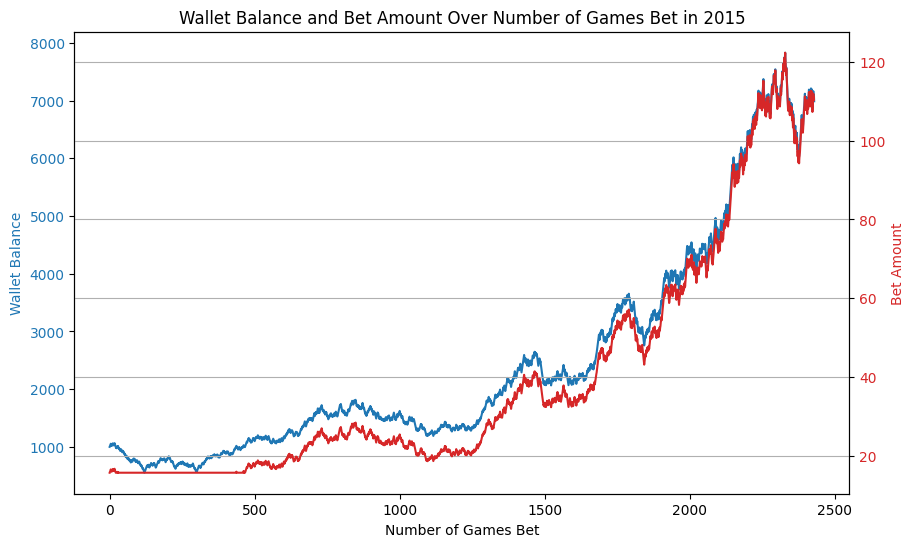

122.36085072839552
15.626771450042725
551.8357703124069
6989.310968544052
                 home_open  visiting_open
Game_ID                                  
20100404BOSNYY1       -114           -106
20100405WASPHI1        170           -200
20100405NYMMIA1       -115           -105
20100405CINSTL1        135           -155
20100405PITLOS1        135           -155
...                    ...            ...
20211027HOUATL1       -115           -105
20211029ATLHOU1       -115           -105
20211030ATLHOU1       -115           -105
20211031ATLHOU1       -105           -115
20211102HOUATL1       -120            100

[28006 rows x 2 columns]
batter data fetched successfully.
pitcher data fetched successfully.
Dropping columns: Index(['date', 'GameId'], dtype='object')
File pybaseball_v3_saved\per_game_data_full.csv already exists.
File pybaseball_v3_saved\per_game_data.csv already exists.
File pybaseball_v3_saved\batter_bwar_data.csv already exists.
File pybaseball_v3_saved\pitcher_bwar_da

Epoch 1: 100%|██████████| 233/233 [00:01<00:00, 161.42it/s]


Training Loss: 0.6937817782803155
Validation Loss: 0.7083311202004552


Epoch 2: 100%|██████████| 233/233 [00:01<00:00, 144.79it/s]


Training Loss: 0.6915231027316637
Validation Loss: 0.6785582136362791


Epoch 3: 100%|██████████| 233/233 [00:01<00:00, 160.82it/s]


Training Loss: 0.6870932034156865
Validation Loss: 0.6949161402881145


Epoch 4: 100%|██████████| 233/233 [00:01<00:00, 171.29it/s]


Training Loss: 0.6859905210687367
Validation Loss: 0.689187578856945


Epoch 5: 100%|██████████| 233/233 [00:01<00:00, 161.90it/s]


Training Loss: 0.6854712193104331
Validation Loss: 0.6770466407760978


Epoch 6: 100%|██████████| 233/233 [00:01<00:00, 167.27it/s]


Training Loss: 0.6839561797518587
Validation Loss: 0.7090878384187818


Epoch 7: 100%|██████████| 233/233 [00:01<00:00, 166.77it/s]


Training Loss: 0.6843192370152781
Validation Loss: 0.6858882559463382


Epoch 8: 100%|██████████| 233/233 [00:01<00:00, 173.85it/s]


Training Loss: 0.6837072367320245
Validation Loss: 0.6819387963041663


Epoch 9: 100%|██████████| 233/233 [00:01<00:00, 173.26it/s]


Training Loss: 0.68172825687433
Validation Loss: 0.6900072954595089


Epoch 10: 100%|██████████| 233/233 [00:01<00:00, 175.75it/s]


Training Loss: 0.6822526424227866
Validation Loss: 0.6788266776129603
Early stopping triggered
Confusion Matrix:
[[ 379  762]
 [ 278 1009]]
Classification Report:
{'0': {'precision': 0.5768645357686454, 'recall': 0.33216476774758985, 'f1-score': 0.42157953281423804, 'support': 1141.0}, '1': {'precision': 0.5697346132128741, 'recall': 0.7839937839937839, 'f1-score': 0.6599084368868542, 'support': 1287.0}, 'accuracy': 0.57166392092257, 'macro avg': {'precision': 0.5732995744907597, 'recall': 0.558079275870687, 'f1-score': 0.5407439848505461, 'support': 2428.0}, 'weighted avg': {'precision': 0.5730852069674601, 'recall': 0.57166392092257, 'f1-score': 0.5479095573370786, 'support': 2428.0}}


Epoch 1: 100%|██████████| 233/233 [00:01<00:00, 167.48it/s]


Training Loss: 0.6940334221835812
Validation Loss: 0.6977921379730105


Epoch 2: 100%|██████████| 233/233 [00:01<00:00, 169.98it/s]


Training Loss: 0.6895946507290197
Validation Loss: 0.6839611195027828


Epoch 3: 100%|██████████| 233/233 [00:01<00:00, 168.96it/s]


Training Loss: 0.6898447175394312
Validation Loss: 0.6897187028080225


Epoch 4: 100%|██████████| 233/233 [00:01<00:00, 173.76it/s]


Training Loss: 0.6865706952856334
Validation Loss: 0.6855778526514769


Epoch 5: 100%|██████████| 233/233 [00:01<00:00, 176.00it/s]


Training Loss: 0.6870911425786981
Validation Loss: 0.6767624905332923


Epoch 6: 100%|██████████| 233/233 [00:01<00:00, 169.25it/s]


Training Loss: 0.68391096105903
Validation Loss: 0.6829294646158814


Epoch 7: 100%|██████████| 233/233 [00:01<00:00, 168.18it/s]


Training Loss: 0.6824536310756667
Validation Loss: 0.6804935839027166


Epoch 8: 100%|██████████| 233/233 [00:01<00:00, 170.34it/s]


Training Loss: 0.6828738829608639
Validation Loss: 0.6798132257536054


Epoch 9: 100%|██████████| 233/233 [00:01<00:00, 163.62it/s]


Training Loss: 0.6808134662746872
Validation Loss: 0.6844869144260883


Epoch 10: 100%|██████████| 233/233 [00:01<00:00, 166.40it/s]


Training Loss: 0.6808800078256959
Validation Loss: 0.6925120279192924
Early stopping triggered
Confusion Matrix:
[[ 352  789]
 [ 246 1041]]
Classification Report:
{'0': {'precision': 0.5886287625418061, 'recall': 0.30850131463628394, 'f1-score': 0.4048303622771708, 'support': 1141.0}, '1': {'precision': 0.5688524590163935, 'recall': 0.8088578088578089, 'f1-score': 0.6679499518768046, 'support': 1287.0}, 'accuracy': 0.5737232289950577, 'macro avg': {'precision': 0.5787406107790998, 'recall': 0.5586795617470464, 'f1-score': 0.5363901570769877, 'support': 2428.0}, 'weighted avg': {'precision': 0.5781460184572896, 'recall': 0.5737232289950577, 'f1-score': 0.5443010837824133, 'support': 2428.0}}


Epoch 1: 100%|██████████| 233/233 [00:01<00:00, 170.04it/s]


Training Loss: 0.6955085785603831
Validation Loss: 0.6910699149593711


Epoch 2: 100%|██████████| 233/233 [00:01<00:00, 173.89it/s]


Training Loss: 0.6927730172488823
Validation Loss: 0.6866904702037573


Epoch 3: 100%|██████████| 233/233 [00:01<00:00, 172.18it/s]


Training Loss: 0.6911399003773799
Validation Loss: 0.6855129133909941


Epoch 4: 100%|██████████| 233/233 [00:01<00:00, 172.92it/s]


Training Loss: 0.6867154097352417
Validation Loss: 0.6925364434719086


Epoch 5: 100%|██████████| 233/233 [00:01<00:00, 169.08it/s]


Training Loss: 0.6845910914977733
Validation Loss: 0.6780463391914964


Epoch 6: 100%|██████████| 233/233 [00:01<00:00, 173.11it/s]


Training Loss: 0.6852442542882436
Validation Loss: 0.6935732690617442


Epoch 7: 100%|██████████| 233/233 [00:01<00:00, 173.82it/s]


Training Loss: 0.6828320752909255
Validation Loss: 0.6818556087091565


Epoch 8: 100%|██████████| 233/233 [00:01<00:00, 161.74it/s]


Training Loss: 0.683084785682449
Validation Loss: 0.6780265867710114


Epoch 9: 100%|██████████| 233/233 [00:01<00:00, 154.09it/s]


Training Loss: 0.6824904828624152
Validation Loss: 0.6803120216354728


Epoch 10: 100%|██████████| 233/233 [00:01<00:00, 167.93it/s]


Training Loss: 0.6815319989883849
Validation Loss: 0.6988231586292386


Epoch 11: 100%|██████████| 233/233 [00:01<00:00, 170.31it/s]


Training Loss: 0.681862373208795
Validation Loss: 0.682627429254353


Epoch 12: 100%|██████████| 233/233 [00:01<00:00, 168.24it/s]


Training Loss: 0.6796626205608057
Validation Loss: 0.6980548165738583


Epoch 13: 100%|██████████| 233/233 [00:01<00:00, 174.37it/s]


Training Loss: 0.6789668691004807
Validation Loss: 0.681045250967145
Early stopping triggered
Confusion Matrix:
[[587 554]
 [481 806]]
Classification Report:
{'0': {'precision': 0.549625468164794, 'recall': 0.5144609991235758, 'f1-score': 0.5314622000905387, 'support': 1141.0}, '1': {'precision': 0.5926470588235294, 'recall': 0.6262626262626263, 'f1-score': 0.6089913109180204, 'support': 1287.0}, 'accuracy': 0.5737232289950577, 'macro avg': {'precision': 0.5711362634941617, 'recall': 0.570361812693101, 'f1-score': 0.5702267555042795, 'support': 2428.0}, 'weighted avg': {'precision': 0.5724297462446097, 'recall': 0.5737232289950577, 'f1-score': 0.5725577378314649, 'support': 2428.0}}
Average Confusion Matrix:
[[439.33333333 701.66666667]
 [335.         952.        ]]
Average Classification Report:
              precision    recall  f1-score      support
0              0.571706  0.385042  0.452624  1141.000000
1              0.577078  0.739705  0.645617  1287.000000
accuracy       0.5730

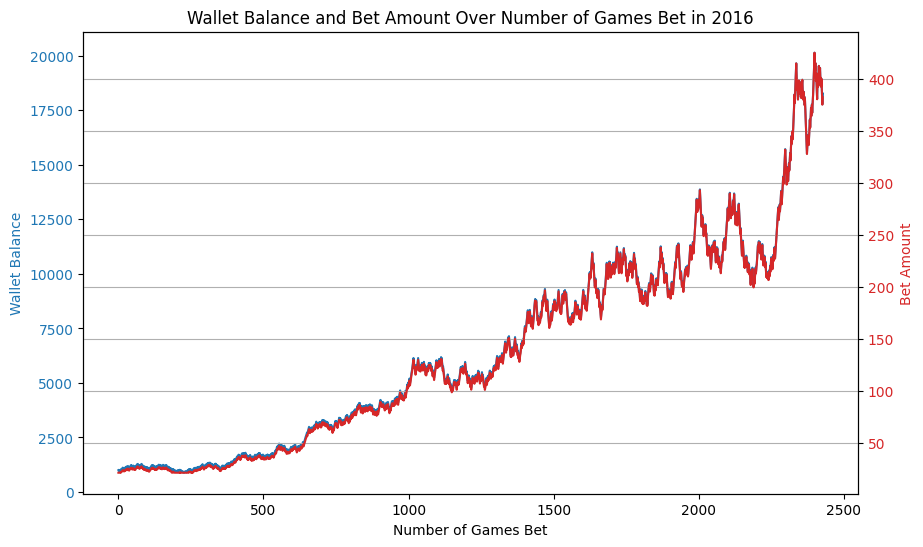

425.0026420525068
21.1002516746521
881.9495229866704
18268.72377100659
                 home_open  visiting_open
Game_ID                                  
20100404BOSNYY1       -114           -106
20100405WASPHI1        170           -200
20100405NYMMIA1       -115           -105
20100405CINSTL1        135           -155
20100405PITLOS1        135           -155
...                    ...            ...
20211027HOUATL1       -115           -105
20211029ATLHOU1       -115           -105
20211030ATLHOU1       -115           -105
20211031ATLHOU1       -105           -115
20211102HOUATL1       -120            100

[28006 rows x 2 columns]
batter data fetched successfully.
pitcher data fetched successfully.
Dropping columns: Index(['date', 'GameId'], dtype='object')
File pybaseball_v3_saved\per_game_data_full.csv already exists.
File pybaseball_v3_saved\per_game_data.csv already exists.
File pybaseball_v3_saved\batter_bwar_data.csv already exists.
File pybaseball_v3_saved\pitcher_bwar_data.

Epoch 1: 100%|██████████| 228/228 [00:01<00:00, 169.11it/s]


Training Loss: 0.6956466666439123
Validation Loss: 0.7040065642326109


Epoch 2: 100%|██████████| 228/228 [00:01<00:00, 172.76it/s]


Training Loss: 0.6891268410703593
Validation Loss: 0.6810879207426502


Epoch 3: 100%|██████████| 228/228 [00:01<00:00, 174.53it/s]


Training Loss: 0.6870065577197493
Validation Loss: 0.6809804304953544


Epoch 4: 100%|██████████| 228/228 [00:01<00:00, 173.03it/s]


Training Loss: 0.6859798460153111
Validation Loss: 0.6812218418044429


Epoch 5: 100%|██████████| 228/228 [00:01<00:00, 173.81it/s]


Training Loss: 0.6840909348245252
Validation Loss: 0.6821399504138578


Epoch 6: 100%|██████████| 228/228 [00:01<00:00, 173.26it/s]


Training Loss: 0.6854277786455656
Validation Loss: 0.6847152171596405


Epoch 7: 100%|██████████| 228/228 [00:01<00:00, 176.49it/s]


Training Loss: 0.6816128821749436
Validation Loss: 0.68146586994971


Epoch 8: 100%|██████████| 228/228 [00:01<00:00, 177.70it/s]


Training Loss: 0.6809759872001514
Validation Loss: 0.6810051010501
Early stopping triggered
Confusion Matrix:
[[454 664]
 [394 918]]
Classification Report:
{'0': {'precision': 0.535377358490566, 'recall': 0.40608228980322003, 'f1-score': 0.46185147507629704, 'support': 1118.0}, '1': {'precision': 0.5802781289506953, 'recall': 0.6996951219512195, 'f1-score': 0.6344160331720802, 'support': 1312.0}, 'accuracy': 0.5646090534979424, 'macro avg': {'precision': 0.5578277437206307, 'recall': 0.5528887058772198, 'f1-score': 0.5481337541241886, 'support': 2430.0}, 'weighted avg': {'precision': 0.5596200790023725, 'recall': 0.5646090534979424, 'f1-score': 0.5550221336037322, 'support': 2430.0}}


Epoch 1: 100%|██████████| 228/228 [00:01<00:00, 166.49it/s]


Training Loss: 0.6950796003404417
Validation Loss: 0.6904121983435846


Epoch 2: 100%|██████████| 228/228 [00:01<00:00, 175.90it/s]


Training Loss: 0.6893122653689301
Validation Loss: 0.6882540016405044


Epoch 3: 100%|██████████| 228/228 [00:01<00:00, 179.39it/s]


Training Loss: 0.6891992784905852
Validation Loss: 0.6845629176785869


Epoch 4: 100%|██████████| 228/228 [00:01<00:00, 178.40it/s]


Training Loss: 0.688984318260561
Validation Loss: 0.6827307151209924


Epoch 5: 100%|██████████| 228/228 [00:01<00:00, 170.37it/s]


Training Loss: 0.6840671512641405
Validation Loss: 0.6830515784602011


Epoch 6: 100%|██████████| 228/228 [00:01<00:00, 173.87it/s]


Training Loss: 0.6828015412677798
Validation Loss: 0.6981147066239388


Epoch 7: 100%|██████████| 228/228 [00:01<00:00, 173.72it/s]


Training Loss: 0.6803647054914843
Validation Loss: 0.6904751485393893


Epoch 8: 100%|██████████| 228/228 [00:01<00:00, 167.71it/s]


Training Loss: 0.6813302050557053
Validation Loss: 0.6813391379771694


Epoch 9: 100%|██████████| 228/228 [00:01<00:00, 173.34it/s]


Training Loss: 0.6814491521371039
Validation Loss: 0.6795758201229957


Epoch 10: 100%|██████████| 228/228 [00:01<00:00, 176.93it/s]


Training Loss: 0.6821377146662327
Validation Loss: 0.6863211287606147


Epoch 11: 100%|██████████| 228/228 [00:01<00:00, 161.58it/s]


Training Loss: 0.6797772091731691
Validation Loss: 0.6814569619394117


Epoch 12: 100%|██████████| 228/228 [00:01<00:00, 174.31it/s]


Training Loss: 0.6793078254712256
Validation Loss: 0.7009969238312014


Epoch 13: 100%|██████████| 228/228 [00:01<00:00, 173.49it/s]


Training Loss: 0.6805680441228967
Validation Loss: 0.6884351218900373


Epoch 14: 100%|██████████| 228/228 [00:01<00:00, 177.38it/s]


Training Loss: 0.6796194688792814
Validation Loss: 0.681550371070062
Early stopping triggered
Confusion Matrix:
[[435 683]
 [392 920]]
Classification Report:
{'0': {'precision': 0.5259975816203144, 'recall': 0.389087656529517, 'f1-score': 0.4473007712082262, 'support': 1118.0}, '1': {'precision': 0.5739238927011853, 'recall': 0.7012195121951219, 'f1-score': 0.6312178387650086, 'support': 1312.0}, 'accuracy': 0.5576131687242798, 'macro avg': {'precision': 0.5499607371607498, 'recall': 0.5451535843623194, 'f1-score': 0.5392593049866174, 'support': 2430.0}, 'weighted avg': {'precision': 0.5518738450516323, 'recall': 0.5576131687242798, 'f1-score': 0.5466008504816824, 'support': 2430.0}}


Epoch 1: 100%|██████████| 228/228 [00:01<00:00, 173.69it/s]


Training Loss: 0.6951738467864823
Validation Loss: 0.6923581313702368


Epoch 2: 100%|██████████| 228/228 [00:01<00:00, 171.97it/s]


Training Loss: 0.6910138548466197
Validation Loss: 0.683005456962893


Epoch 3: 100%|██████████| 228/228 [00:01<00:00, 176.52it/s]


Training Loss: 0.6901792536179224
Validation Loss: 0.6903635571079869


Epoch 4: 100%|██████████| 228/228 [00:01<00:00, 175.38it/s]


Training Loss: 0.6890220111399367
Validation Loss: 0.6820762945759681


Epoch 5: 100%|██████████| 228/228 [00:01<00:00, 173.24it/s]


Training Loss: 0.6841500652463812
Validation Loss: 0.6910364377883172


Epoch 6: 100%|██████████| 228/228 [00:01<00:00, 172.28it/s]


Training Loss: 0.6835075250843115
Validation Loss: 0.6835635198700812


Epoch 7: 100%|██████████| 228/228 [00:01<00:00, 175.86it/s]


Training Loss: 0.6829999086626789
Validation Loss: 0.6809548822141462


Epoch 8: 100%|██████████| 228/228 [00:01<00:00, 174.34it/s]


Training Loss: 0.6812446457252168
Validation Loss: 0.6943563472840094


Epoch 9: 100%|██████████| 228/228 [00:01<00:00, 174.22it/s]


Training Loss: 0.6811589065350985
Validation Loss: 0.6820103305001413


Epoch 10: 100%|██████████| 228/228 [00:01<00:00, 166.92it/s]


Training Loss: 0.6810546731739714
Validation Loss: 0.6846011511741146


Epoch 11: 100%|██████████| 228/228 [00:01<00:00, 159.05it/s]


Training Loss: 0.6797578162268588
Validation Loss: 0.6873250844017151


Epoch 12: 100%|██████████| 228/228 [00:01<00:00, 165.58it/s]


Training Loss: 0.6802600292783034
Validation Loss: 0.6795736926217233


Epoch 13: 100%|██████████| 228/228 [00:01<00:00, 173.59it/s]


Training Loss: 0.6784833554635968
Validation Loss: 0.6984685294089779


Epoch 14: 100%|██████████| 228/228 [00:01<00:00, 173.25it/s]


Training Loss: 0.6783316977191389
Validation Loss: 0.6958271457302955


Epoch 15: 100%|██████████| 228/228 [00:01<00:00, 173.47it/s]


Training Loss: 0.6792067033157014
Validation Loss: 0.6818571186834766


Epoch 16: 100%|██████████| 228/228 [00:01<00:00, 176.39it/s]


Training Loss: 0.6802371458003396
Validation Loss: 0.6840952557902182


Epoch 17: 100%|██████████| 228/228 [00:01<00:00, 174.71it/s]


Training Loss: 0.6778017794876768
Validation Loss: 0.6827798235800958
Early stopping triggered
Confusion Matrix:
[[ 324  794]
 [ 274 1038]]
Classification Report:
{'0': {'precision': 0.5418060200668896, 'recall': 0.2898032200357782, 'f1-score': 0.37762237762237766, 'support': 1118.0}, '1': {'precision': 0.5665938864628821, 'recall': 0.7911585365853658, 'f1-score': 0.6603053435114503, 'support': 1312.0}, 'accuracy': 0.5604938271604938, 'macro avg': {'precision': 0.5541999532648858, 'recall': 0.540480878310572, 'f1-score': 0.518963860566914, 'support': 2430.0}, 'weighted avg': {'precision': 0.5551894277671127, 'recall': 0.5604938271604938, 'f1-score': 0.5302479131147494, 'support': 2430.0}}
Average Confusion Matrix:
[[404.33333333 713.66666667]
 [353.33333333 958.66666667]]
Average Classification Report:
              precision    recall  f1-score      support
0              0.534394  0.361658  0.428925  1118.000000
1              0.573599  0.730691  0.641980  1312.000000
accuracy       

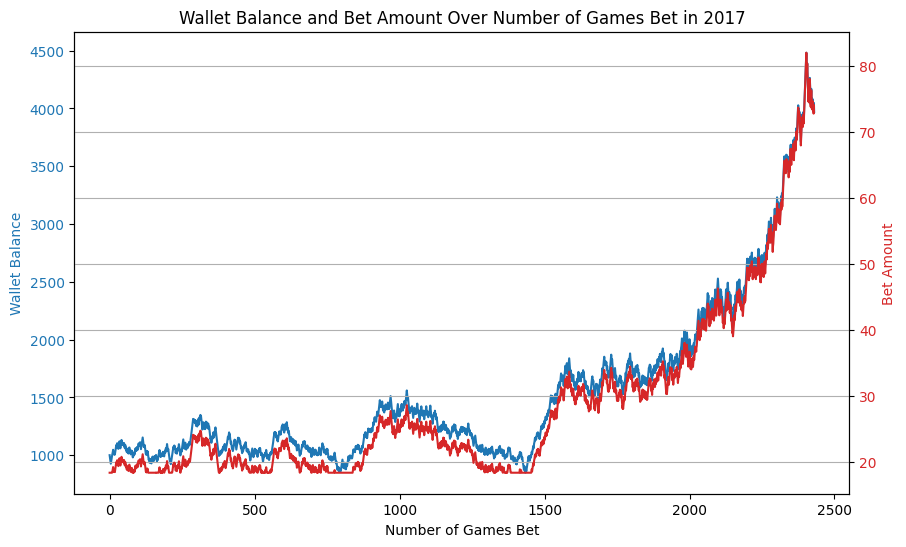

82.05646876105538
18.30660581588745
848.367062574344
3969.63535649553
                 home_open  visiting_open
Game_ID                                  
20100404BOSNYY1       -114           -106
20100405WASPHI1        170           -200
20100405NYMMIA1       -115           -105
20100405CINSTL1        135           -155
20100405PITLOS1        135           -155
...                    ...            ...
20211027HOUATL1       -115           -105
20211029ATLHOU1       -115           -105
20211030ATLHOU1       -115           -105
20211031ATLHOU1       -105           -115
20211102HOUATL1       -120            100

[28006 rows x 2 columns]
batter data fetched successfully.
pitcher data fetched successfully.
Dropping columns: Index(['date', 'GameId'], dtype='object')
File pybaseball_v3_saved\per_game_data_full.csv already exists.
File pybaseball_v3_saved\per_game_data.csv already exists.
File pybaseball_v3_saved\batter_bwar_data.csv already exists.
File pybaseball_v3_saved\pitcher_bwar_data.c

Epoch 1: 100%|██████████| 226/226 [00:01<00:00, 168.17it/s]


Training Loss: 0.6946121673140906
Validation Loss: 0.7127501935255333


Epoch 2: 100%|██████████| 226/226 [00:01<00:00, 173.50it/s]


Training Loss: 0.6919655536128356
Validation Loss: 0.6883117927879584


Epoch 3: 100%|██████████| 226/226 [00:01<00:00, 173.93it/s]


Training Loss: 0.6880554678165807
Validation Loss: 0.7088227653112568


Epoch 4: 100%|██████████| 226/226 [00:01<00:00, 171.67it/s]


Training Loss: 0.6852461687758961
Validation Loss: 0.704624207293401


Epoch 5: 100%|██████████| 226/226 [00:01<00:00, 163.46it/s]


Training Loss: 0.6844597991588897
Validation Loss: 0.6873588102762817


Epoch 6: 100%|██████████| 226/226 [00:01<00:00, 169.25it/s]


Training Loss: 0.6832398445205351
Validation Loss: 0.6840013959368721


Epoch 7: 100%|██████████| 226/226 [00:01<00:00, 171.71it/s]


Training Loss: 0.6822376269682319
Validation Loss: 0.7048576943209914


Epoch 8: 100%|██████████| 226/226 [00:01<00:00, 173.66it/s]


Training Loss: 0.683446698747905
Validation Loss: 0.6771518031104666


Epoch 9: 100%|██████████| 226/226 [00:01<00:00, 172.87it/s]


Training Loss: 0.6816698043747286
Validation Loss: 0.6855529488110151


Epoch 10: 100%|██████████| 226/226 [00:01<00:00, 174.38it/s]


Training Loss: 0.681399405002594
Validation Loss: 0.6841859827276136


Epoch 11: 100%|██████████| 226/226 [00:01<00:00, 172.10it/s]


Training Loss: 0.681288310120591
Validation Loss: 0.6952497548744326


Epoch 12: 100%|██████████| 226/226 [00:01<00:00, 172.89it/s]


Training Loss: 0.6803996312407266
Validation Loss: 0.6862037465220592


Epoch 13: 100%|██████████| 226/226 [00:01<00:00, 172.20it/s]


Training Loss: 0.68010600504622
Validation Loss: 0.6792648102416367
Early stopping triggered
Confusion Matrix:
[[416 732]
 [302 981]]
Classification Report:
{'0': {'precision': 0.5793871866295265, 'recall': 0.3623693379790941, 'f1-score': 0.44587352625937837, 'support': 1148.0}, '1': {'precision': 0.5726795096322241, 'recall': 0.764614185502728, 'f1-score': 0.6548731642189586, 'support': 1283.0}, 'accuracy': 0.5746606334841629, 'macro avg': {'precision': 0.5760333481308753, 'recall': 0.563491761740911, 'f1-score': 0.5503733452391685, 'support': 2431.0}, 'weighted avg': {'precision': 0.5758471004149897, 'recall': 0.5746606334841629, 'f1-score': 0.5561765026074414, 'support': 2431.0}}


Epoch 1: 100%|██████████| 226/226 [00:01<00:00, 170.37it/s]


Training Loss: 0.6934978645459741
Validation Loss: 0.6936007923767215


Epoch 2: 100%|██████████| 226/226 [00:01<00:00, 172.61it/s]


Training Loss: 0.6904348517413688
Validation Loss: 0.7012104626561775


Epoch 3: 100%|██████████| 226/226 [00:01<00:00, 173.78it/s]


Training Loss: 0.6894789528002782
Validation Loss: 0.684910710717811


Epoch 4: 100%|██████████| 226/226 [00:01<00:00, 171.30it/s]


Training Loss: 0.6869481134731158
Validation Loss: 0.684181354084953


Epoch 5: 100%|██████████| 226/226 [00:01<00:00, 161.43it/s]


Training Loss: 0.684148074515098
Validation Loss: 0.6827217360011867


Epoch 6: 100%|██████████| 226/226 [00:01<00:00, 159.17it/s]


Training Loss: 0.6831090748310089
Validation Loss: 0.693339683970467


Epoch 7: 100%|██████████| 226/226 [00:01<00:00, 168.57it/s]


Training Loss: 0.6830757226036713
Validation Loss: 0.679316475743153


Epoch 8: 100%|██████████| 226/226 [00:01<00:00, 169.62it/s]


Training Loss: 0.6836603442124561
Validation Loss: 0.6840813062230094


Epoch 9: 100%|██████████| 226/226 [00:01<00:00, 163.13it/s]


Training Loss: 0.6809681693537045
Validation Loss: 0.6772145922066736


Epoch 10: 100%|██████████| 226/226 [00:01<00:00, 166.10it/s]


Training Loss: 0.6819651583127216
Validation Loss: 0.6869537068195031


Epoch 11: 100%|██████████| 226/226 [00:01<00:00, 168.32it/s]


Training Loss: 0.6817870250845377
Validation Loss: 0.6795688828483957


Epoch 12: 100%|██████████| 226/226 [00:01<00:00, 175.03it/s]


Training Loss: 0.680367403062044
Validation Loss: 0.6870181638686383


Epoch 13: 100%|██████████| 226/226 [00:01<00:00, 178.09it/s]


Training Loss: 0.6789883963302173
Validation Loss: 0.6834001326170124


Epoch 14: 100%|██████████| 226/226 [00:01<00:00, 172.17it/s]


Training Loss: 0.6807111746969476
Validation Loss: 0.687346815085802
Early stopping triggered
Confusion Matrix:
[[472 676]
 [348 935]]
Classification Report:
{'0': {'precision': 0.5756097560975609, 'recall': 0.41114982578397213, 'f1-score': 0.4796747967479674, 'support': 1148.0}, '1': {'precision': 0.5803848541278709, 'recall': 0.7287607170693686, 'f1-score': 0.6461644782308223, 'support': 1283.0}, 'accuracy': 0.5787741670094612, 'macro avg': {'precision': 0.5779973051127159, 'recall': 0.5699552714266704, 'f1-score': 0.5629196374893949, 'support': 2431.0}, 'weighted avg': {'precision': 0.5781298921620972, 'recall': 0.5787741670094612, 'f1-score': 0.5675424484725675, 'support': 2431.0}}


Epoch 1: 100%|██████████| 226/226 [00:01<00:00, 173.75it/s]


Training Loss: 0.6930399349832956
Validation Loss: 0.6890120965535523


Epoch 2: 100%|██████████| 226/226 [00:01<00:00, 169.30it/s]


Training Loss: 0.6892090645511594
Validation Loss: 0.6860411821818743


Epoch 3: 100%|██████████| 226/226 [00:01<00:00, 174.12it/s]


Training Loss: 0.6882712395317787
Validation Loss: 0.6850025341159007


Epoch 4: 100%|██████████| 226/226 [00:01<00:00, 167.21it/s]


Training Loss: 0.6856046814834122
Validation Loss: 0.6815742762362371


Epoch 5: 100%|██████████| 226/226 [00:01<00:00, 161.24it/s]


Training Loss: 0.6853501490787067
Validation Loss: 0.6883498996984764


Epoch 6: 100%|██████████| 226/226 [00:01<00:00, 177.22it/s]


Training Loss: 0.683725602595152
Validation Loss: 0.704696319142326


Epoch 7: 100%|██████████| 226/226 [00:01<00:00, 175.40it/s]


Training Loss: 0.684132123415449
Validation Loss: 0.6905934116879447


Epoch 8: 100%|██████████| 226/226 [00:01<00:00, 172.93it/s]


Training Loss: 0.6824135753960736
Validation Loss: 0.6819729736593904


Epoch 9: 100%|██████████| 226/226 [00:01<00:00, 155.84it/s]


Training Loss: 0.6828777850729174
Validation Loss: 0.6831775190400295
Early stopping triggered
Confusion Matrix:
[[ 303  845]
 [ 208 1075]]
Classification Report:
{'0': {'precision': 0.5929549902152642, 'recall': 0.26393728222996515, 'f1-score': 0.36528028933092227, 'support': 1148.0}, '1': {'precision': 0.5598958333333334, 'recall': 0.8378799688230709, 'f1-score': 0.6712457071495475, 'support': 1283.0}, 'accuracy': 0.5668449197860963, 'macro avg': {'precision': 0.5764254117742988, 'recall': 0.5509086255265181, 'f1-score': 0.5182629982402349, 'support': 2431.0}, 'weighted avg': {'precision': 0.5755074796107733, 'recall': 0.5668449197860963, 'f1-score': 0.5267585415157416, 'support': 2431.0}}
Average Confusion Matrix:
[[397. 751.]
 [286. 997.]]
Average Classification Report:
              precision    recall  f1-score      support
0              0.582651  0.345819  0.430276  1148.000000
1              0.570987  0.777085  0.657428  1283.000000
accuracy       0.573427  0.573427  0.573427 

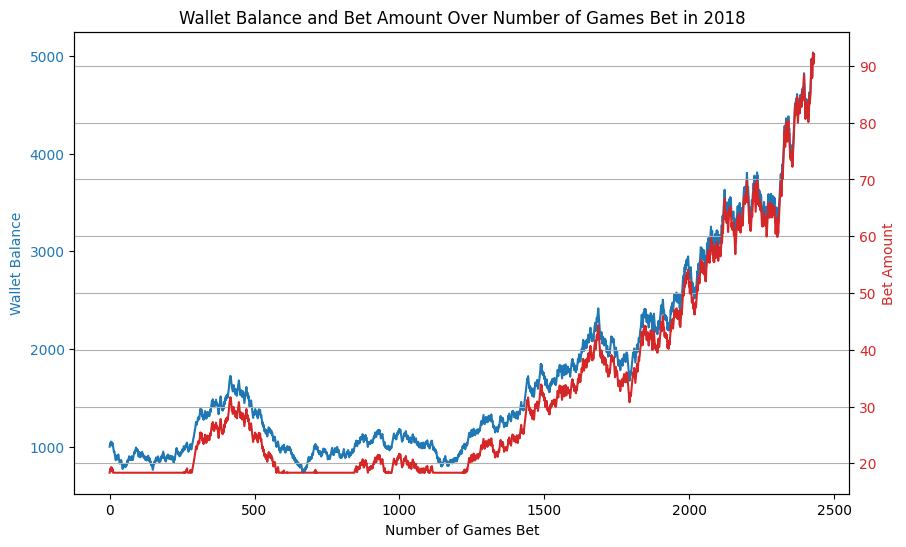

92.31383098025066
18.348816633224487
734.2449990141347
5011.20647753752
                 home_open  visiting_open
Game_ID                                  
20100404BOSNYY1       -114           -106
20100405WASPHI1        170           -200
20100405NYMMIA1       -115           -105
20100405CINSTL1        135           -155
20100405PITLOS1        135           -155
...                    ...            ...
20211027HOUATL1       -115           -105
20211029ATLHOU1       -115           -105
20211030ATLHOU1       -115           -105
20211031ATLHOU1       -105           -115
20211102HOUATL1       -120            100

[28006 rows x 2 columns]
batter data fetched successfully.
pitcher data fetched successfully.
Dropping columns: Index(['date', 'GameId'], dtype='object')
File pybaseball_v3_saved\per_game_data_full.csv already exists.
File pybaseball_v3_saved\per_game_data.csv already exists.
File pybaseball_v3_saved\batter_bwar_data.csv already exists.
File pybaseball_v3_saved\pitcher_bwar_data

Epoch 1: 100%|██████████| 227/227 [00:01<00:00, 165.72it/s]


Training Loss: 0.69482890152196
Validation Loss: 0.6992637886375678


Epoch 2: 100%|██████████| 227/227 [00:01<00:00, 162.21it/s]


Training Loss: 0.6920678846636533
Validation Loss: 0.6850547731899824


Epoch 3: 100%|██████████| 227/227 [00:01<00:00, 163.26it/s]


Training Loss: 0.6884319711361687
Validation Loss: 0.699408516532085


Epoch 4: 100%|██████████| 227/227 [00:01<00:00, 166.47it/s]


Training Loss: 0.685427878134051
Validation Loss: 0.691389557768087


Epoch 5: 100%|██████████| 227/227 [00:01<00:00, 165.01it/s]


Training Loss: 0.685225500146723
Validation Loss: 0.6840188806174231


Epoch 6: 100%|██████████| 227/227 [00:01<00:00, 166.10it/s]


Training Loss: 0.6828345745670638
Validation Loss: 0.6867117315042214


Epoch 7: 100%|██████████| 227/227 [00:01<00:00, 153.81it/s]


Training Loss: 0.6826012433888103
Validation Loss: 0.6833073750871127


Epoch 8: 100%|██████████| 227/227 [00:01<00:00, 155.48it/s]


Training Loss: 0.6808802257025295
Validation Loss: 0.6847988953355884


Epoch 9: 100%|██████████| 227/227 [00:01<00:00, 160.73it/s]


Training Loss: 0.6789695620536804
Validation Loss: 0.682010462049578


Epoch 10: 100%|██████████| 227/227 [00:01<00:00, 172.14it/s]


Training Loss: 0.6801873143549008
Validation Loss: 0.6837274881659962


Epoch 11: 100%|██████████| 227/227 [00:01<00:00, 164.90it/s]


Training Loss: 0.6783202356178855
Validation Loss: 0.6823348901310905


Epoch 12: 100%|██████████| 227/227 [00:01<00:00, 170.28it/s]


Training Loss: 0.6789608306296596
Validation Loss: 0.686931767424599


Epoch 13: 100%|██████████| 227/227 [00:01<00:00, 173.01it/s]


Training Loss: 0.6784759631240945
Validation Loss: 0.6827862946713557


Epoch 14: 100%|██████████| 227/227 [00:01<00:00, 166.87it/s]


Training Loss: 0.6783202658140712
Validation Loss: 0.6855646919031613
Early stopping triggered
Confusion Matrix:
[[476 667]
 [342 944]]
Classification Report:
{'0': {'precision': 0.5819070904645477, 'recall': 0.41644794400699914, 'f1-score': 0.4854665986741459, 'support': 1143.0}, '1': {'precision': 0.5859714463066419, 'recall': 0.7340590979782271, 'f1-score': 0.6517086641353124, 'support': 1286.0}, 'accuracy': 0.5846027171675586, 'macro avg': {'precision': 0.5839392683855948, 'recall': 0.5752535209926131, 'f1-score': 0.5685876314047291, 'support': 2429.0}, 'weighted avg': {'precision': 0.5840589066905391, 'recall': 0.5846027171675586, 'f1-score': 0.5734811298322603, 'support': 2429.0}}


Epoch 1: 100%|██████████| 227/227 [00:01<00:00, 162.55it/s]


Training Loss: 0.6954323053359985
Validation Loss: 0.687460612078182


Epoch 2: 100%|██████████| 227/227 [00:01<00:00, 164.38it/s]


Training Loss: 0.6892057946074902
Validation Loss: 0.6837641157087733


Epoch 3: 100%|██████████| 227/227 [00:01<00:00, 170.93it/s]


Training Loss: 0.686851347333009
Validation Loss: 0.6857828116807781


Epoch 4: 100%|██████████| 227/227 [00:01<00:00, 174.18it/s]


Training Loss: 0.6847237038717396
Validation Loss: 0.6850423949663756


Epoch 5: 100%|██████████| 227/227 [00:01<00:00, 171.72it/s]


Training Loss: 0.6865219255901118
Validation Loss: 0.6817936301231384


Epoch 6: 100%|██████████| 227/227 [00:01<00:00, 172.87it/s]


Training Loss: 0.6839558453286797
Validation Loss: 0.6898762114712449


Epoch 7: 100%|██████████| 227/227 [00:01<00:00, 172.20it/s]


Training Loss: 0.6829318123241879
Validation Loss: 0.682070405756841


Epoch 8: 100%|██████████| 227/227 [00:01<00:00, 169.06it/s]


Training Loss: 0.6806513877167051
Validation Loss: 0.682951964315821


Epoch 9: 100%|██████████| 227/227 [00:01<00:00, 167.16it/s]


Training Loss: 0.6800013095271745
Validation Loss: 0.6842151518727912


Epoch 10: 100%|██████████| 227/227 [00:01<00:00, 166.94it/s]


Training Loss: 0.6802931364937501
Validation Loss: 0.6847671074945418
Early stopping triggered
Confusion Matrix:
[[636 507]
 [488 798]]
Classification Report:
{'0': {'precision': 0.5658362989323843, 'recall': 0.5564304461942258, 'f1-score': 0.5610939567710632, 'support': 1143.0}, '1': {'precision': 0.6114942528735632, 'recall': 0.6205287713841369, 'f1-score': 0.6159783867232728, 'support': 1286.0}, 'accuracy': 0.5903664059283655, 'macro avg': {'precision': 0.5886652759029738, 'recall': 0.5884796087891813, 'f1-score': 0.588536171747168, 'support': 2429.0}, 'weighted avg': {'precision': 0.5900092626081176, 'recall': 0.5903664059283655, 'f1-score': 0.5901517488330399, 'support': 2429.0}}


Epoch 1: 100%|██████████| 227/227 [00:01<00:00, 153.27it/s]


Training Loss: 0.6926396352604097
Validation Loss: 0.6898819901904122


Epoch 2: 100%|██████████| 227/227 [00:01<00:00, 163.71it/s]


Training Loss: 0.6883620462228548
Validation Loss: 0.6958493668524945


Epoch 3: 100%|██████████| 227/227 [00:01<00:00, 164.02it/s]


Training Loss: 0.6880452911234112
Validation Loss: 0.6846029611884571


Epoch 4: 100%|██████████| 227/227 [00:01<00:00, 169.03it/s]


Training Loss: 0.6847422020550866
Validation Loss: 0.6821984160141866


Epoch 5: 100%|██████████| 227/227 [00:01<00:00, 169.17it/s]


Training Loss: 0.683227615209403
Validation Loss: 0.6817728114909813


Epoch 6: 100%|██████████| 227/227 [00:01<00:00, 155.59it/s]


Training Loss: 0.6813208009177892
Validation Loss: 0.7019917241862563


Epoch 7: 100%|██████████| 227/227 [00:01<00:00, 136.44it/s]


Training Loss: 0.6816141390065265
Validation Loss: 0.686871099667471


Epoch 8: 100%|██████████| 227/227 [00:01<00:00, 154.43it/s]


Training Loss: 0.6820704645522365
Validation Loss: 0.6962697017388265


Epoch 9: 100%|██████████| 227/227 [00:01<00:00, 156.54it/s]


Training Loss: 0.6821368741043864
Validation Loss: 0.6831857806346455


Epoch 10: 100%|██████████| 227/227 [00:01<00:00, 166.42it/s]


Training Loss: 0.6793785415556988
Validation Loss: 0.6846581570437698
Early stopping triggered
Confusion Matrix:
[[487 656]
 [351 935]]
Classification Report:
{'0': {'precision': 0.581145584725537, 'recall': 0.42607174103237094, 'f1-score': 0.491670873296315, 'support': 1143.0}, '1': {'precision': 0.5876807039597737, 'recall': 0.7270606531881804, 'f1-score': 0.6499826207855404, 'support': 1286.0}, 'accuracy': 0.5854261012762454, 'macro avg': {'precision': 0.5844131443426553, 'recall': 0.5765661971102757, 'f1-score': 0.5708267470409276, 'support': 2429.0}, 'weighted avg': {'precision': 0.5846055119940543, 'recall': 0.5854261012762454, 'f1-score': 0.5754868087722902, 'support': 2429.0}}
Average Confusion Matrix:
[[533.         610.        ]
 [393.66666667 892.33333333]]
Average Classification Report:
              precision    recall  f1-score      support
0              0.576296  0.466317  0.512744  1143.000000
1              0.595049  0.693883  0.639223  1286.000000
accuracy       0.58

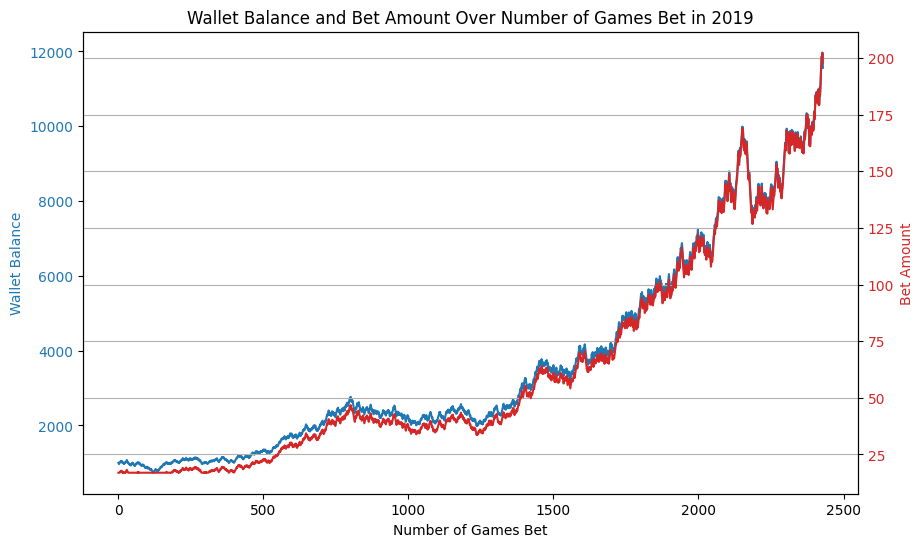

202.39083390363555
16.9143944978714
736.0894105913201
11564.238996050806
                 home_open  visiting_open
Game_ID                                  
20100404BOSNYY1       -114           -106
20100405WASPHI1        170           -200
20100405NYMMIA1       -115           -105
20100405CINSTL1        135           -155
20100405PITLOS1        135           -155
...                    ...            ...
20211027HOUATL1       -115           -105
20211029ATLHOU1       -115           -105
20211030ATLHOU1       -115           -105
20211031ATLHOU1       -105           -115
20211102HOUATL1       -120            100

[28006 rows x 2 columns]
batter data fetched successfully.
pitcher data fetched successfully.
Dropping columns: Index(['date', 'GameId'], dtype='object')
File pybaseball_v3_saved\per_game_data_full.csv already exists.
File pybaseball_v3_saved\per_game_data.csv already exists.
File pybaseball_v3_saved\batter_bwar_data.csv already exists.
File pybaseball_v3_saved\pitcher_bwar_dat

Epoch 1: 100%|██████████| 227/227 [00:01<00:00, 158.54it/s]


Training Loss: 0.6929637676818781
Validation Loss: 0.6817900772954597


Epoch 2: 100%|██████████| 227/227 [00:01<00:00, 139.41it/s]


Training Loss: 0.6872132210479434
Validation Loss: 0.7041374366791522


Epoch 3: 100%|██████████| 227/227 [00:01<00:00, 165.59it/s]


Training Loss: 0.6884761221608401
Validation Loss: 0.6968151858595552


Epoch 4: 100%|██████████| 227/227 [00:01<00:00, 155.34it/s]


Training Loss: 0.6835193972755634
Validation Loss: 0.6827336657242696


Epoch 5: 100%|██████████| 227/227 [00:01<00:00, 145.06it/s]


Training Loss: 0.6804689738718949
Validation Loss: 0.6825616232684402


Epoch 6: 100%|██████████| 227/227 [00:01<00:00, 149.79it/s]


Training Loss: 0.6791917206432325
Validation Loss: 0.6791054244901313


Epoch 7: 100%|██████████| 227/227 [00:01<00:00, 153.50it/s]


Training Loss: 0.6785999426232561
Validation Loss: 0.700462456609382


Epoch 8: 100%|██████████| 227/227 [00:01<00:00, 166.55it/s]


Training Loss: 0.6771791254371273
Validation Loss: 0.683336178787419


Epoch 9: 100%|██████████| 227/227 [00:01<00:00, 151.97it/s]


Training Loss: 0.6774639161672886
Validation Loss: 0.6830434388801699


Epoch 10: 100%|██████████| 227/227 [00:01<00:00, 167.99it/s]


Training Loss: 0.6781137640780814
Validation Loss: 0.6816876032313363


Epoch 11: 100%|██████████| 227/227 [00:01<00:00, 154.54it/s]


Training Loss: 0.6785862212139079
Validation Loss: 0.6825617590888602
Early stopping triggered
Confusion Matrix:
[[177 221]
 [162 338]]
Classification Report:
{'0': {'precision': 0.5221238938053098, 'recall': 0.44472361809045224, 'f1-score': 0.480325644504749, 'support': 398.0}, '1': {'precision': 0.6046511627906976, 'recall': 0.676, 'f1-score': 0.6383380547686497, 'support': 500.0}, 'accuracy': 0.5734966592427617, 'macro avg': {'precision': 0.5633875282980036, 'recall': 0.5603618090452261, 'f1-score': 0.5593318496366994, 'support': 898.0}, 'weighted avg': {'precision': 0.5680744890087551, 'recall': 0.5734966592427617, 'f1-score': 0.5683058283933352, 'support': 898.0}}


Epoch 1: 100%|██████████| 227/227 [00:01<00:00, 159.59it/s]


Training Loss: 0.6935824470898129
Validation Loss: 0.6808139662273595


Epoch 2: 100%|██████████| 227/227 [00:01<00:00, 157.71it/s]


Training Loss: 0.6870767248359546
Validation Loss: 0.6887007424088775


Epoch 3: 100%|██████████| 227/227 [00:01<00:00, 157.06it/s]


Training Loss: 0.6858608769950363
Validation Loss: 0.6805454404627691


Epoch 4: 100%|██████████| 227/227 [00:01<00:00, 162.63it/s]


Training Loss: 0.6814690024842249
Validation Loss: 0.6897476208014567


Epoch 5: 100%|██████████| 227/227 [00:01<00:00, 161.28it/s]


Training Loss: 0.6824527083514546
Validation Loss: 0.6823298696611748


Epoch 6: 100%|██████████| 227/227 [00:01<00:00, 158.20it/s]


Training Loss: 0.6839169022270236
Validation Loss: 0.6813888755001005


Epoch 7: 100%|██████████| 227/227 [00:01<00:00, 147.72it/s]


Training Loss: 0.679728380383899
Validation Loss: 0.6831445205407064


Epoch 8: 100%|██████████| 227/227 [00:01<00:00, 162.15it/s]


Training Loss: 0.6789689386993778
Validation Loss: 0.7133456996229829
Early stopping triggered
Confusion Matrix:
[[245 153]
 [246 254]]
Classification Report:
{'0': {'precision': 0.4989816700610998, 'recall': 0.6155778894472361, 'f1-score': 0.5511811023622046, 'support': 398.0}, '1': {'precision': 0.6240786240786241, 'recall': 0.508, 'f1-score': 0.5600882028665931, 'support': 500.0}, 'accuracy': 0.5556792873051225, 'macro avg': {'precision': 0.5615301470698619, 'recall': 0.5617889447236181, 'f1-score': 0.5556346526143989, 'support': 898.0}, 'weighted avg': {'precision': 0.5686347624984741, 'recall': 0.5556792873051225, 'f1-score': 0.5561405124425991, 'support': 898.0}}


Epoch 1: 100%|██████████| 227/227 [00:01<00:00, 162.09it/s]


Training Loss: 0.6945587653945721
Validation Loss: 0.6907655831243171


Epoch 2: 100%|██████████| 227/227 [00:01<00:00, 165.72it/s]


Training Loss: 0.6888655568534582
Validation Loss: 0.6976373918720933


Epoch 3: 100%|██████████| 227/227 [00:01<00:00, 171.58it/s]


Training Loss: 0.6836034456013583
Validation Loss: 0.6812814415478315


Epoch 4: 100%|██████████| 227/227 [00:01<00:00, 165.30it/s]


Training Loss: 0.6822999140764648
Validation Loss: 0.6829639643919273


Epoch 5: 100%|██████████| 227/227 [00:01<00:00, 164.68it/s]


Training Loss: 0.6830813456736997
Validation Loss: 0.6805307112756322


Epoch 6: 100%|██████████| 227/227 [00:01<00:00, 155.97it/s]


Training Loss: 0.6803315596958615
Validation Loss: 0.6793273394225073


Epoch 7: 100%|██████████| 227/227 [00:01<00:00, 158.31it/s]


Training Loss: 0.6797304988432561
Validation Loss: 0.6805533405210151


Epoch 8: 100%|██████████| 227/227 [00:01<00:00, 167.33it/s]


Training Loss: 0.6789559506634784
Validation Loss: 0.6901821757926315


Epoch 9: 100%|██████████| 227/227 [00:01<00:00, 161.28it/s]


Training Loss: 0.6785989989268097
Validation Loss: 0.6792247676458515


Epoch 10: 100%|██████████| 227/227 [00:01<00:00, 151.72it/s]


Training Loss: 0.6783080022240525
Validation Loss: 0.6816300007163502


Epoch 11: 100%|██████████| 227/227 [00:01<00:00, 150.81it/s]


Training Loss: 0.6767287642945277
Validation Loss: 0.6851138501870827


Epoch 12: 100%|██████████| 227/227 [00:01<00:00, 181.88it/s]


Training Loss: 0.6769479568309196
Validation Loss: 0.6834778502339223


Epoch 13: 100%|██████████| 227/227 [00:01<00:00, 170.80it/s]


Training Loss: 0.6771294600637999
Validation Loss: 0.6928955218831047


Epoch 14: 100%|██████████| 227/227 [00:01<00:00, 166.41it/s]


Training Loss: 0.6746083763202382
Validation Loss: 0.6939186571074314
Early stopping triggered
Confusion Matrix:
[[185 213]
 [169 331]]
Classification Report:
{'0': {'precision': 0.5225988700564972, 'recall': 0.4648241206030151, 'f1-score': 0.49202127659574474, 'support': 398.0}, '1': {'precision': 0.6084558823529411, 'recall': 0.662, 'f1-score': 0.6340996168582376, 'support': 500.0}, 'accuracy': 0.5746102449888641, 'macro avg': {'precision': 0.5655273762047192, 'recall': 0.5634120603015076, 'f1-score': 0.5630604467269912, 'support': 898.0}, 'weighted avg': {'precision': 0.5704034426046285, 'recall': 0.5746102449888641, 'f1-score': 0.5711294838688478, 'support': 898.0}}
Average Confusion Matrix:
[[202.33333333 195.66666667]
 [192.33333333 307.66666667]]
Average Classification Report:
              precision    recall  f1-score     support
0              0.514568  0.508375  0.507843  398.000000
1              0.612395  0.615333  0.610842  500.000000
accuracy       0.567929  0.567929  0.

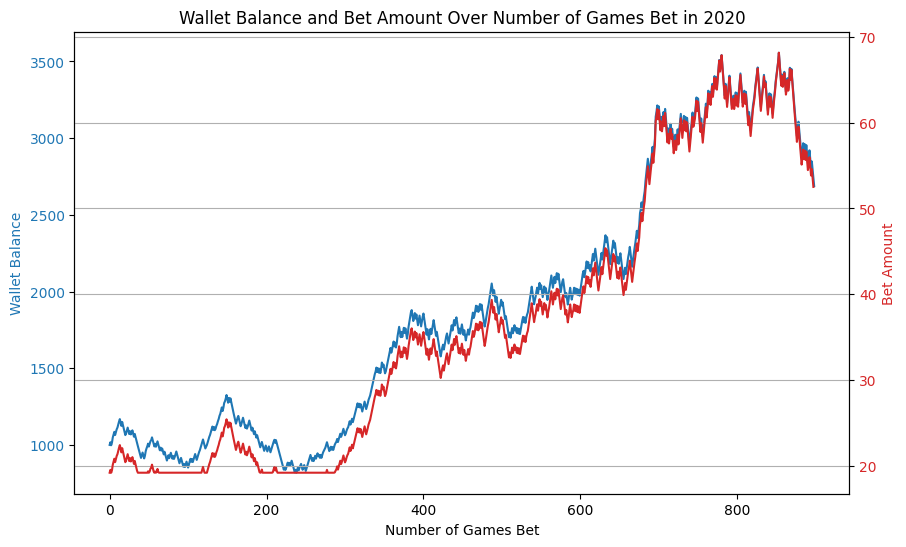

68.17749913067934
19.167103171348572
818.693275602331
2687.460570888395
                 home_open  visiting_open
Game_ID                                  
20100404BOSNYY1       -114           -106
20100405WASPHI1        170           -200
20100405NYMMIA1       -115           -105
20100405CINSTL1        135           -155
20100405PITLOS1        135           -155
...                    ...            ...
20211027HOUATL1       -115           -105
20211029ATLHOU1       -115           -105
20211030ATLHOU1       -115           -105
20211031ATLHOU1       -105           -115
20211102HOUATL1       -120            100

[28006 rows x 2 columns]
batter data fetched successfully.
pitcher data fetched successfully.
Dropping columns: Index(['date', 'GameId'], dtype='object')
File pybaseball_v3_saved\per_game_data_full.csv already exists.
File pybaseball_v3_saved\per_game_data.csv already exists.
File pybaseball_v3_saved\batter_bwar_data.csv already exists.
File pybaseball_v3_saved\pitcher_bwar_data

Epoch 1: 100%|██████████| 209/209 [00:01<00:00, 178.97it/s]


Training Loss: 0.6945310577251124
Validation Loss: 0.6872778066567012


Epoch 2: 100%|██████████| 209/209 [00:01<00:00, 171.59it/s]


Training Loss: 0.6904106419622613
Validation Loss: 0.6856528499296733


Epoch 3: 100%|██████████| 209/209 [00:01<00:00, 179.04it/s]


Training Loss: 0.6899052675831261
Validation Loss: 0.684103827391352


Epoch 4: 100%|██████████| 209/209 [00:01<00:00, 173.05it/s]


Training Loss: 0.686352953100889
Validation Loss: 0.6781844241278512


Epoch 5: 100%|██████████| 209/209 [00:01<00:00, 172.44it/s]


Training Loss: 0.6824523561308828
Validation Loss: 0.6761888584920338


Epoch 6: 100%|██████████| 209/209 [00:01<00:00, 172.58it/s]


Training Loss: 0.6831444807029797
Validation Loss: 0.680128738284111


Epoch 7: 100%|██████████| 209/209 [00:01<00:00, 177.84it/s]


Training Loss: 0.6800737700393896
Validation Loss: 0.6861029033149991


Epoch 8: 100%|██████████| 209/209 [00:01<00:00, 180.87it/s]


Training Loss: 0.6791309001343102
Validation Loss: 0.6793619234647069


Epoch 9: 100%|██████████| 209/209 [00:01<00:00, 176.72it/s]


Training Loss: 0.6794439768106744
Validation Loss: 0.6765681271042142


Epoch 10: 100%|██████████| 209/209 [00:01<00:00, 173.84it/s]


Training Loss: 0.6790817670844959
Validation Loss: 0.6809402917112622
Early stopping triggered
Confusion Matrix:
[[499 621]
 [369 940]]
Classification Report:
{'0': {'precision': 0.5748847926267281, 'recall': 0.4455357142857143, 'f1-score': 0.5020120724346077, 'support': 1120.0}, '1': {'precision': 0.6021780909673287, 'recall': 0.7181054239877769, 'f1-score': 0.6550522648083623, 'support': 1309.0}, 'accuracy': 0.5924248662000824, 'macro avg': {'precision': 0.5885314417970284, 'recall': 0.5818205691367456, 'f1-score': 0.578532168621485, 'support': 2429.0}, 'weighted avg': {'precision': 0.5895932848160431, 'recall': 0.5924248662000824, 'f1-score': 0.5844861818694552, 'support': 2429.0}}


Epoch 1: 100%|██████████| 209/209 [00:01<00:00, 178.84it/s]


Training Loss: 0.6948543692889967
Validation Loss: 0.687352794621672


Epoch 2: 100%|██████████| 209/209 [00:01<00:00, 176.85it/s]


Training Loss: 0.6886146952661031
Validation Loss: 0.6980312626276698


Epoch 3: 100%|██████████| 209/209 [00:01<00:00, 178.41it/s]


Training Loss: 0.6873734185570165
Validation Loss: 0.6983972638845444


Epoch 4: 100%|██████████| 209/209 [00:01<00:00, 174.87it/s]


Training Loss: 0.684491789226897
Validation Loss: 0.68166626564094


Epoch 5: 100%|██████████| 209/209 [00:01<00:00, 174.48it/s]


Training Loss: 0.6814646176173926
Validation Loss: 0.677211099437305


Epoch 6: 100%|██████████| 209/209 [00:01<00:00, 180.10it/s]


Training Loss: 0.6813285872696689
Validation Loss: 0.6782401693718774


Epoch 7: 100%|██████████| 209/209 [00:01<00:00, 178.73it/s]


Training Loss: 0.6802418454412068
Validation Loss: 0.6897285580635071


Epoch 8: 100%|██████████| 209/209 [00:01<00:00, 175.51it/s]


Training Loss: 0.681785054184033
Validation Loss: 0.6790482785020556


Epoch 9: 100%|██████████| 209/209 [00:01<00:00, 179.19it/s]


Training Loss: 0.6807190390865198
Validation Loss: 0.6787502850805011


Epoch 10: 100%|██████████| 209/209 [00:01<00:00, 177.10it/s]


Training Loss: 0.6795651131269465
Validation Loss: 0.6750963010958263


Epoch 11: 100%|██████████| 209/209 [00:01<00:00, 177.90it/s]


Training Loss: 0.6788833783003703
Validation Loss: 0.6857995401535716


Epoch 12: 100%|██████████| 209/209 [00:01<00:00, 180.55it/s]


Training Loss: 0.6775790013765034
Validation Loss: 0.6776690397943769


Epoch 13: 100%|██████████| 209/209 [00:01<00:00, 180.18it/s]


Training Loss: 0.6778420897191791
Validation Loss: 0.6874106717961175


Epoch 14: 100%|██████████| 209/209 [00:01<00:00, 179.68it/s]


Training Loss: 0.6778683519819707
Validation Loss: 0.6760053219539779


Epoch 15: 100%|██████████| 209/209 [00:01<00:00, 178.22it/s]


Training Loss: 0.6772477147681861
Validation Loss: 0.6774225745882306
Early stopping triggered
Confusion Matrix:
[[466 654]
 [339 970]]
Classification Report:
{'0': {'precision': 0.5788819875776398, 'recall': 0.4160714285714286, 'f1-score': 0.48415584415584423, 'support': 1120.0}, '1': {'precision': 0.5972906403940886, 'recall': 0.7410236822001528, 'f1-score': 0.6614387998636208, 'support': 1309.0}, 'accuracy': 0.5911897900370523, 'macro avg': {'precision': 0.5880863139858642, 'recall': 0.5785475553857907, 'f1-score': 0.5727973220097324, 'support': 2429.0}, 'weighted avg': {'precision': 0.5888025007669075, 'recall': 0.5911897900370523, 'f1-score': 0.5796944975199774, 'support': 2429.0}}


Epoch 1: 100%|██████████| 209/209 [00:01<00:00, 179.60it/s]


Training Loss: 0.6934326767351069
Validation Loss: 0.7038164330380303


Epoch 2: 100%|██████████| 209/209 [00:01<00:00, 180.33it/s]


Training Loss: 0.6874885062851974
Validation Loss: 0.6789648394499507


Epoch 3: 100%|██████████| 209/209 [00:01<00:00, 180.35it/s]


Training Loss: 0.6852605020600643
Validation Loss: 0.686296250138964


Epoch 4: 100%|██████████| 209/209 [00:01<00:00, 177.88it/s]


Training Loss: 0.6838925848737287
Validation Loss: 0.6903401645166534


Epoch 5: 100%|██████████| 209/209 [00:01<00:00, 180.43it/s]


Training Loss: 0.6827570068779174
Validation Loss: 0.6969935319253376


Epoch 6: 100%|██████████| 209/209 [00:01<00:00, 178.55it/s]


Training Loss: 0.6810182777888467
Validation Loss: 0.6786730065941811


Epoch 7: 100%|██████████| 209/209 [00:01<00:00, 178.64it/s]


Training Loss: 0.6845207522360331
Validation Loss: 0.6800170253430095


Epoch 8: 100%|██████████| 209/209 [00:01<00:00, 175.87it/s]


Training Loss: 0.6814325468962272
Validation Loss: 0.7196980480636869


Epoch 9: 100%|██████████| 209/209 [00:01<00:00, 178.67it/s]


Training Loss: 0.6795990512701884
Validation Loss: 0.6787987298199109


Epoch 10: 100%|██████████| 209/209 [00:01<00:00, 180.81it/s]


Training Loss: 0.6772667945286874
Validation Loss: 0.6864428722432682


Epoch 11: 100%|██████████| 209/209 [00:01<00:00, 183.43it/s]


Training Loss: 0.679736942195436
Validation Loss: 0.6804323419928551
Early stopping triggered
Confusion Matrix:
[[586 534]
 [478 831]]
Classification Report:
{'0': {'precision': 0.5507518796992481, 'recall': 0.5232142857142857, 'f1-score': 0.5366300366300365, 'support': 1120.0}, '1': {'precision': 0.6087912087912087, 'recall': 0.6348357524828113, 'f1-score': 0.6215407629020194, 'support': 1309.0}, 'accuracy': 0.5833676410045286, 'macro avg': {'precision': 0.5797715442452285, 'recall': 0.5790250190985485, 'f1-score': 0.5790853997660279, 'support': 2429.0}, 'weighted avg': {'precision': 0.5820295584894402, 'recall': 0.5833676410045286, 'f1-score': 0.582388843007157, 'support': 2429.0}}
Average Confusion Matrix:
[[517.         603.        ]
 [395.33333333 913.66666667]]
Average Classification Report:
              precision    recall  f1-score      support
0              0.568173  0.461607  0.507599  1120.000000
1              0.602753  0.697988  0.646011  1309.000000
accuracy       0.588

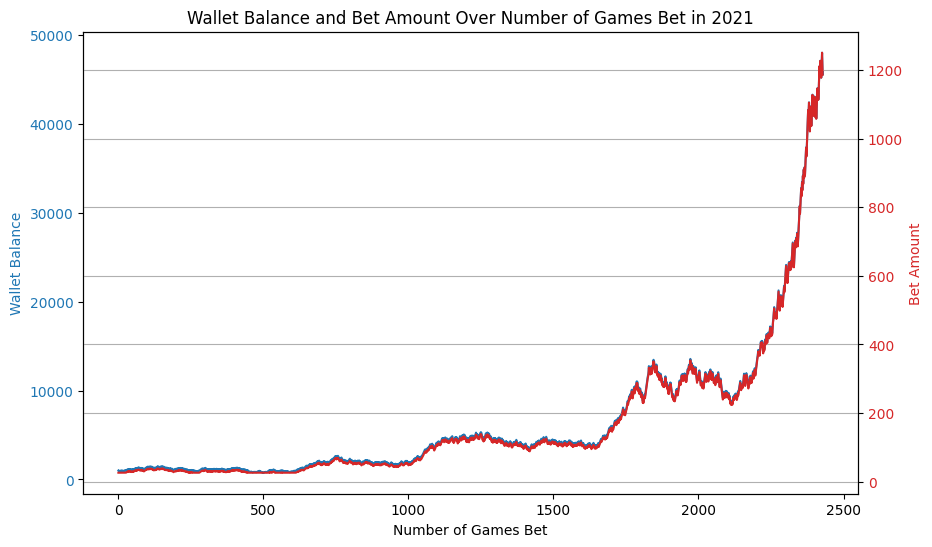

1250.5023519060978
26.054604649543762
760.5507476778477
45856.51874803724
                 home_open  visiting_open
Game_ID                                  
20100404BOSNYY1       -114           -106
20100405WASPHI1        170           -200
20100405NYMMIA1       -115           -105
20100405CINSTL1        135           -155
20100405PITLOS1        135           -155
...                    ...            ...
20211027HOUATL1       -115           -105
20211029ATLHOU1       -115           -105
20211030ATLHOU1       -115           -105
20211031ATLHOU1       -105           -115
20211102HOUATL1       -120            100

[28006 rows x 2 columns]
batter data fetched successfully.
pitcher data fetched successfully.
Dropping columns: Index(['date', 'GameId'], dtype='object')
File pybaseball_v3_saved\per_game_data_full.csv already exists.
File pybaseball_v3_saved\per_game_data.csv already exists.
File pybaseball_v3_saved\batter_bwar_data.csv already exists.
File pybaseball_v3_saved\pitcher_bwar_da

Epoch 1: 100%|██████████| 208/208 [00:01<00:00, 180.99it/s]


Training Loss: 0.6929224411455485
Validation Loss: 0.686270993735109


Epoch 2: 100%|██████████| 208/208 [00:01<00:00, 182.20it/s]


Training Loss: 0.6885921760247304
Validation Loss: 0.6843771530049187


Epoch 3: 100%|██████████| 208/208 [00:01<00:00, 179.87it/s]


Training Loss: 0.6860268520048032
Validation Loss: 0.6778229208929198


Epoch 4: 100%|██████████| 208/208 [00:01<00:00, 182.62it/s]


Training Loss: 0.6814669201580378
Validation Loss: 0.679341339639255


Epoch 5: 100%|██████████| 208/208 [00:01<00:00, 180.26it/s]


Training Loss: 0.6825063068133134
Validation Loss: 0.6751530681337629


Epoch 6: 100%|██████████| 208/208 [00:01<00:00, 180.32it/s]


Training Loss: 0.6832802943312205
Validation Loss: 0.6868259140423366


Epoch 7: 100%|██████████| 208/208 [00:01<00:00, 184.03it/s]


Training Loss: 0.6819944172524489
Validation Loss: 0.7065704145601818


Epoch 8: 100%|██████████| 208/208 [00:01<00:00, 177.18it/s]


Training Loss: 0.6809505421954852
Validation Loss: 0.6752178307090487


Epoch 9: 100%|██████████| 208/208 [00:01<00:00, 177.62it/s]


Training Loss: 0.6800159476697445
Validation Loss: 0.6877240102205958


Epoch 10: 100%|██████████| 208/208 [00:01<00:00, 181.02it/s]


Training Loss: 0.6791528669687418
Validation Loss: 0.6741257799523217


Epoch 11: 100%|██████████| 208/208 [00:01<00:00, 175.66it/s]


Training Loss: 0.6799567086765399
Validation Loss: 0.6886829233595303


Epoch 12: 100%|██████████| 208/208 [00:01<00:00, 179.86it/s]


Training Loss: 0.679362239745947
Validation Loss: 0.6792277161564145


Epoch 13: 100%|██████████| 208/208 [00:01<00:00, 182.12it/s]


Training Loss: 0.6755909802248845
Validation Loss: 0.7009533665009907


Epoch 14: 100%|██████████| 208/208 [00:01<00:00, 178.53it/s]


Training Loss: 0.6772621752550969
Validation Loss: 0.6814753721867289


Epoch 15: 100%|██████████| 208/208 [00:01<00:00, 182.01it/s]


Training Loss: 0.678697276287354
Validation Loss: 0.673088398362909


Epoch 16: 100%|██████████| 208/208 [00:01<00:00, 180.58it/s]


Training Loss: 0.6759943747176573
Validation Loss: 0.6913376546331814


Epoch 17: 100%|██████████| 208/208 [00:01<00:00, 181.61it/s]


Training Loss: 0.6790140526225934
Validation Loss: 0.6759218243615968


Epoch 18: 100%|██████████| 208/208 [00:01<00:00, 181.69it/s]


Training Loss: 0.6751903968934829
Validation Loss: 0.6742329746484756


Epoch 19: 100%|██████████| 208/208 [00:01<00:00, 181.18it/s]


Training Loss: 0.6744348297898586
Validation Loss: 0.6785264015197754


Epoch 20: 100%|██████████| 208/208 [00:01<00:00, 181.87it/s]


Training Loss: 0.6750770603808073
Validation Loss: 0.6730514839291573


Epoch 21: 100%|██████████| 208/208 [00:01<00:00, 179.19it/s]


Training Loss: 0.6743204298500831
Validation Loss: 0.6923419120056289


Epoch 22: 100%|██████████| 208/208 [00:01<00:00, 176.72it/s]


Training Loss: 0.6738380623551515
Validation Loss: 0.676611419234957


Epoch 23: 100%|██████████| 208/208 [00:01<00:00, 177.63it/s]


Training Loss: 0.6721673553379682
Validation Loss: 0.6756194436124393


Epoch 24: 100%|██████████| 208/208 [00:01<00:00, 181.13it/s]


Training Loss: 0.6752126678251303
Validation Loss: 0.6781729491693633


Epoch 25: 100%|██████████| 208/208 [00:01<00:00, 180.24it/s]


Training Loss: 0.6738744750618935
Validation Loss: 0.6937405775700297
Early stopping triggered
Confusion Matrix:
[[703 431]
 [535 761]]
Classification Report:
{'0': {'precision': 0.5678513731825525, 'recall': 0.6199294532627866, 'f1-score': 0.5927487352445194, 'support': 1134.0}, '1': {'precision': 0.6384228187919463, 'recall': 0.5871913580246914, 'f1-score': 0.6117363344051447, 'support': 1296.0}, 'accuracy': 0.6024691358024692, 'macro avg': {'precision': 0.6031370959872494, 'recall': 0.6035604056437389, 'f1-score': 0.6022425348248321, 'support': 2430.0}, 'weighted avg': {'precision': 0.6054894775075625, 'recall': 0.6024691358024692, 'f1-score': 0.602875454796853, 'support': 2430.0}}


Epoch 1: 100%|██████████| 208/208 [00:01<00:00, 179.35it/s]


Training Loss: 0.6926946966693952
Validation Loss: 0.6848279940230506


Epoch 2: 100%|██████████| 208/208 [00:01<00:00, 180.09it/s]


Training Loss: 0.6870845814163868
Validation Loss: 0.677230284682342


Epoch 3: 100%|██████████| 208/208 [00:01<00:00, 181.17it/s]


Training Loss: 0.6841918548139242
Validation Loss: 0.6780920177698135


Epoch 4: 100%|██████████| 208/208 [00:01<00:00, 181.90it/s]


Training Loss: 0.6848443729373125
Validation Loss: 0.6727746033242771


Epoch 5: 100%|██████████| 208/208 [00:01<00:00, 172.86it/s]


Training Loss: 0.683692023731195
Validation Loss: 0.6822921559214592


Epoch 6: 100%|██████████| 208/208 [00:01<00:00, 181.35it/s]


Training Loss: 0.6824817886719337
Validation Loss: 0.704421300973211


Epoch 7: 100%|██████████| 208/208 [00:01<00:00, 180.79it/s]


Training Loss: 0.6806804976211145
Validation Loss: 0.6938917764595577


Epoch 8: 100%|██████████| 208/208 [00:01<00:00, 178.13it/s]


Training Loss: 0.6801342640358669
Validation Loss: 0.6785519836204392


Epoch 9: 100%|██████████| 208/208 [00:01<00:00, 177.60it/s]


Training Loss: 0.67897406908182
Validation Loss: 0.6904819895114217
Early stopping triggered
Confusion Matrix:
[[652 482]
 [466 830]]
Classification Report:
{'0': {'precision': 0.5831842576028623, 'recall': 0.5749559082892416, 'f1-score': 0.5790408525754884, 'support': 1134.0}, '1': {'precision': 0.6326219512195121, 'recall': 0.6404320987654321, 'f1-score': 0.6365030674846625, 'support': 1296.0}, 'accuracy': 0.6098765432098765, 'macro avg': {'precision': 0.6079031044111872, 'recall': 0.6076940035273368, 'f1-score': 0.6077719600300755, 'support': 2430.0}, 'weighted avg': {'precision': 0.6095510275317422, 'recall': 0.6098765432098765, 'f1-score': 0.6096873671937145, 'support': 2430.0}}


Epoch 1: 100%|██████████| 208/208 [00:01<00:00, 181.81it/s]


Training Loss: 0.6921460404992104
Validation Loss: 0.6999173302735601


Epoch 2: 100%|██████████| 208/208 [00:01<00:00, 179.42it/s]


Training Loss: 0.6847371625212523
Validation Loss: 0.6878383840833392


Epoch 3: 100%|██████████| 208/208 [00:01<00:00, 180.47it/s]


Training Loss: 0.6854911114160831
Validation Loss: 0.6911526843905449


Epoch 4: 100%|██████████| 208/208 [00:01<00:00, 178.42it/s]


Training Loss: 0.6866963379658185
Validation Loss: 0.6796189610447202


Epoch 5: 100%|██████████| 208/208 [00:01<00:00, 180.64it/s]


Training Loss: 0.6825082279168643
Validation Loss: 0.7059836387634277


Epoch 6: 100%|██████████| 208/208 [00:01<00:00, 179.17it/s]


Training Loss: 0.6804703425329465
Validation Loss: 0.6788567166243281


Epoch 7: 100%|██████████| 208/208 [00:01<00:00, 178.30it/s]


Training Loss: 0.6791266922194225
Validation Loss: 0.6816626382725579


Epoch 8: 100%|██████████| 208/208 [00:01<00:00, 177.06it/s]


Training Loss: 0.6787348131720836
Validation Loss: 0.6805326736399105


Epoch 9: 100%|██████████| 208/208 [00:01<00:00, 182.68it/s]


Training Loss: 0.6802568137645721
Validation Loss: 0.6769246352570397


Epoch 10: 100%|██████████| 208/208 [00:01<00:00, 182.93it/s]


Training Loss: 0.6766288572779069
Validation Loss: 0.6729094407388142


Epoch 11: 100%|██████████| 208/208 [00:01<00:00, 183.42it/s]


Training Loss: 0.6781400579672593
Validation Loss: 0.6769943535327911


Epoch 12: 100%|██████████| 208/208 [00:01<00:00, 178.05it/s]


Training Loss: 0.6773770305399711
Validation Loss: 0.6722099759749004


Epoch 13: 100%|██████████| 208/208 [00:01<00:00, 181.78it/s]


Training Loss: 0.6758993119001389
Validation Loss: 0.6768778104867254


Epoch 14: 100%|██████████| 208/208 [00:01<00:00, 180.47it/s]


Training Loss: 0.6750848287573228
Validation Loss: 0.6852102151938847


Epoch 15: 100%|██████████| 208/208 [00:01<00:00, 181.32it/s]


Training Loss: 0.6757399210563073
Validation Loss: 0.6758838849408286


Epoch 16: 100%|██████████| 208/208 [00:01<00:00, 178.93it/s]


Training Loss: 0.6740819754508826
Validation Loss: 0.6783932383571353


Epoch 17: 100%|██████████| 208/208 [00:01<00:00, 181.78it/s]


Training Loss: 0.673886762215541
Validation Loss: 0.7337190519486155
Early stopping triggered
Confusion Matrix:
[[622 512]
 [458 838]]
Classification Report:
{'0': {'precision': 0.575925925925926, 'recall': 0.5485008818342152, 'f1-score': 0.5618789521228547, 'support': 1134.0}, '1': {'precision': 0.6207407407407407, 'recall': 0.6466049382716049, 'f1-score': 0.6334089191232047, 'support': 1296.0}, 'accuracy': 0.6008230452674898, 'macro avg': {'precision': 0.5983333333333334, 'recall': 0.59755291005291, 'f1-score': 0.5976439356230296, 'support': 2430.0}, 'weighted avg': {'precision': 0.5998271604938271, 'recall': 0.6008230452674898, 'f1-score': 0.6000282678563748, 'support': 2430.0}}
Average Confusion Matrix:
[[659.         475.        ]
 [486.33333333 809.66666667]]
Average Classification Report:
              precision    recall  f1-score     support
0              0.575654  0.581129  0.577890  1134.00000
1              0.630595  0.624743  0.627216  1296.00000
accuracy       0.604390  

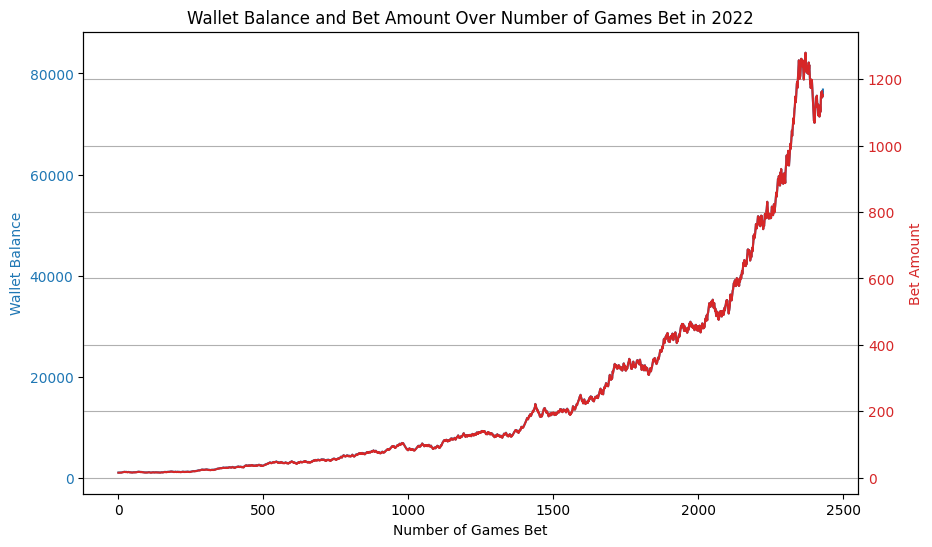

1279.5010731463844
15.212509632110596
969.5749807357788
76814.31330327582
                 home_open  visiting_open
Game_ID                                  
20100404BOSNYY1       -114           -106
20100405WASPHI1        170           -200
20100405NYMMIA1       -115           -105
20100405CINSTL1        135           -155
20100405PITLOS1        135           -155
...                    ...            ...
20211027HOUATL1       -115           -105
20211029ATLHOU1       -115           -105
20211030ATLHOU1       -115           -105
20211031ATLHOU1       -105           -115
20211102HOUATL1       -120            100

[28006 rows x 2 columns]
batter data fetched successfully.
pitcher data fetched successfully.
Dropping columns: Index(['date', 'GameId'], dtype='object')
File pybaseball_v3_saved\per_game_data_full.csv already exists.
File pybaseball_v3_saved\per_game_data.csv already exists.
File pybaseball_v3_saved\batter_bwar_data.csv already exists.
File pybaseball_v3_saved\pitcher_bwar_da

Epoch 1: 100%|██████████| 207/207 [00:01<00:00, 182.26it/s]


Training Loss: 0.6937456634885447
Validation Loss: 0.6903229313237327


Epoch 2: 100%|██████████| 207/207 [00:01<00:00, 182.10it/s]


Training Loss: 0.6888356341256036
Validation Loss: 0.6939673562135015


Epoch 3: 100%|██████████| 207/207 [00:01<00:00, 179.80it/s]


Training Loss: 0.6840484243084267
Validation Loss: 0.683101915887424


Epoch 4: 100%|██████████| 207/207 [00:01<00:00, 180.98it/s]


Training Loss: 0.6790308336128935
Validation Loss: 0.679279584969793


Epoch 5: 100%|██████████| 207/207 [00:01<00:00, 179.93it/s]


Training Loss: 0.6769196356552235
Validation Loss: 0.6987167660679136


Epoch 6: 100%|██████████| 207/207 [00:01<00:00, 180.00it/s]


Training Loss: 0.6783113047696542
Validation Loss: 0.6874359580022948


Epoch 7: 100%|██████████| 207/207 [00:01<00:00, 181.66it/s]


Training Loss: 0.6752451183139414
Validation Loss: 0.687130236199924


Epoch 8: 100%|██████████| 207/207 [00:01<00:00, 179.34it/s]


Training Loss: 0.6757208949701797
Validation Loss: 0.6961520899619374


Epoch 9: 100%|██████████| 207/207 [00:01<00:00, 180.90it/s]


Training Loss: 0.6757386669444577
Validation Loss: 0.6962653270789555
Early stopping triggered
Confusion Matrix:
[[538 626]
 [393 873]]
Classification Report:
{'0': {'precision': 0.5778732545649838, 'recall': 0.46219931271477666, 'f1-score': 0.5136038186157519, 'support': 1164.0}, '1': {'precision': 0.5823882588392262, 'recall': 0.6895734597156398, 'f1-score': 0.6314647377938517, 'support': 1266.0}, 'accuracy': 0.5806584362139918, 'macro avg': {'precision': 0.580130756702105, 'recall': 0.5758863862152082, 'f1-score': 0.5725342782048017, 'support': 2430.0}, 'weighted avg': {'precision': 0.5802255160510705, 'recall': 0.5806584362139918, 'f1-score': 0.5750079024344656, 'support': 2430.0}}


Epoch 1: 100%|██████████| 207/207 [00:01<00:00, 177.11it/s]


Training Loss: 0.6925798409802902
Validation Loss: 0.6864035299846104


Epoch 2: 100%|██████████| 207/207 [00:01<00:00, 177.46it/s]


Training Loss: 0.6841119501901709
Validation Loss: 0.6852057075926236


Epoch 3: 100%|██████████| 207/207 [00:01<00:00, 177.69it/s]


Training Loss: 0.682646515864681
Validation Loss: 0.687558471092156


Epoch 4: 100%|██████████| 207/207 [00:01<00:00, 180.75it/s]


Training Loss: 0.6789166305376135
Validation Loss: 0.7055717387369701


Epoch 5: 100%|██████████| 207/207 [00:01<00:00, 175.56it/s]


Training Loss: 0.6785524308969433
Validation Loss: 0.6832276337913105


Epoch 6: 100%|██████████| 207/207 [00:01<00:00, 169.90it/s]


Training Loss: 0.6776334971621416
Validation Loss: 0.68502141641719


Epoch 7: 100%|██████████| 207/207 [00:01<00:00, 169.33it/s]


Training Loss: 0.6766730316595179
Validation Loss: 0.6853689934526171


Epoch 8: 100%|██████████| 207/207 [00:01<00:00, 172.76it/s]


Training Loss: 0.6737634882258908
Validation Loss: 0.6831084127937045


Epoch 9: 100%|██████████| 207/207 [00:01<00:00, 170.71it/s]


Training Loss: 0.6759137018867161
Validation Loss: 0.6841412239841053


Epoch 10: 100%|██████████| 207/207 [00:01<00:00, 178.54it/s]


Training Loss: 0.6774920685855663
Validation Loss: 0.6831107852714402


Epoch 11: 100%|██████████| 207/207 [00:01<00:00, 181.33it/s]


Training Loss: 0.6749914852893295
Validation Loss: 0.6795552458081927


Epoch 12: 100%|██████████| 207/207 [00:01<00:00, 179.38it/s]


Training Loss: 0.6720351991446122
Validation Loss: 0.6809180400201252


Epoch 13: 100%|██████████| 207/207 [00:01<00:00, 176.36it/s]


Training Loss: 0.6718682200436431
Validation Loss: 0.6960167118481227


Epoch 14: 100%|██████████| 207/207 [00:01<00:00, 177.85it/s]


Training Loss: 0.671057965732427
Validation Loss: 0.6850244317735944


Epoch 15: 100%|██████████| 207/207 [00:01<00:00, 180.36it/s]


Training Loss: 0.6705607360111918
Validation Loss: 0.6788249164819717


Epoch 16: 100%|██████████| 207/207 [00:01<00:00, 177.88it/s]


Training Loss: 0.6688124047961213
Validation Loss: 0.681769351874079


Epoch 17: 100%|██████████| 207/207 [00:01<00:00, 177.96it/s]


Training Loss: 0.6702100179621563
Validation Loss: 0.6813955903053284


Epoch 18: 100%|██████████| 207/207 [00:01<00:00, 176.23it/s]


Training Loss: 0.6689321902639048
Validation Loss: 0.706402314560754


Epoch 19: 100%|██████████| 207/207 [00:01<00:00, 176.21it/s]


Training Loss: 0.6674261824520313
Validation Loss: 0.6802635150296348


Epoch 20: 100%|██████████| 207/207 [00:01<00:00, 181.91it/s]


Training Loss: 0.6688179229768578
Validation Loss: 0.6979558733957154
Early stopping triggered
Confusion Matrix:
[[662 502]
 [482 784]]
Classification Report:
{'0': {'precision': 0.5786713286713286, 'recall': 0.5687285223367697, 'f1-score': 0.5736568457538995, 'support': 1164.0}, '1': {'precision': 0.609642301710731, 'recall': 0.6192733017377567, 'f1-score': 0.6144200626959248, 'support': 1266.0}, 'accuracy': 0.5950617283950618, 'macro avg': {'precision': 0.5941568151910298, 'recall': 0.5940009120372632, 'f1-score': 0.5940384542249122, 'support': 2430.0}, 'weighted avg': {'precision': 0.5948068232671655, 'recall': 0.5950617283950618, 'f1-score': 0.5948939785311028, 'support': 2430.0}}


Epoch 1: 100%|██████████| 207/207 [00:01<00:00, 173.99it/s]


Training Loss: 0.6926894832924368
Validation Loss: 0.6867665659104075


Epoch 2: 100%|██████████| 207/207 [00:01<00:00, 180.69it/s]


Training Loss: 0.6838099279841363
Validation Loss: 0.6814719885587692


Epoch 3: 100%|██████████| 207/207 [00:01<00:00, 180.69it/s]


Training Loss: 0.681079660060901
Validation Loss: 0.6887860308800425


Epoch 4: 100%|██████████| 207/207 [00:01<00:00, 181.75it/s]


Training Loss: 0.6792995048605878
Validation Loss: 0.6831935601575034


Epoch 5: 100%|██████████| 207/207 [00:01<00:00, 177.63it/s]


Training Loss: 0.6770552042601765
Validation Loss: 0.6975422065172877


Epoch 6: 100%|██████████| 207/207 [00:01<00:00, 179.54it/s]


Training Loss: 0.6768460780526129
Validation Loss: 0.6851969467742103


Epoch 7: 100%|██████████| 207/207 [00:01<00:00, 177.28it/s]


Training Loss: 0.6768062661811349
Validation Loss: 0.6871010171515601
Early stopping triggered
Confusion Matrix:
[[676 488]
 [544 722]]
Classification Report:
{'0': {'precision': 0.5540983606557377, 'recall': 0.5807560137457045, 'f1-score': 0.5671140939597317, 'support': 1164.0}, '1': {'precision': 0.596694214876033, 'recall': 0.5703001579778831, 'f1-score': 0.5831987075928918, 'support': 1266.0}, 'accuracy': 0.5753086419753086, 'macro avg': {'precision': 0.5753962877658854, 'recall': 0.5755280858617938, 'f1-score': 0.5751564007763117, 'support': 2430.0}, 'weighted avg': {'precision': 0.5762902748297681, 'recall': 0.5753086419753086, 'f1-score': 0.5754939790871311, 'support': 2430.0}}
Average Confusion Matrix:
[[625.33333333 538.66666667]
 [473.         793.        ]]
Average Classification Report:
              precision    recall  f1-score      support
0              0.570214  0.537228  0.551458  1164.000000
1              0.596242  0.626382  0.609695  1266.000000
accuracy       0.58

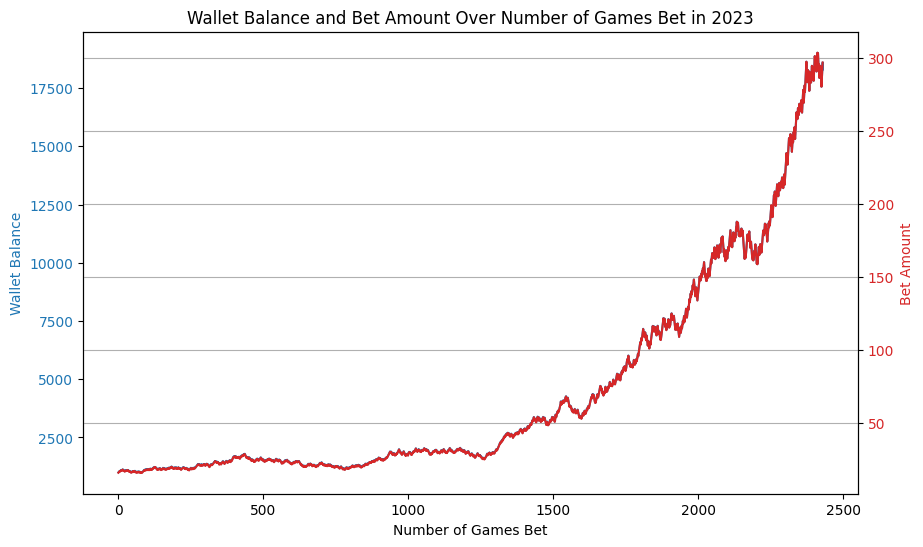

303.7523177311785
15.971580147743225
985.7235156572345
18302.780636380503


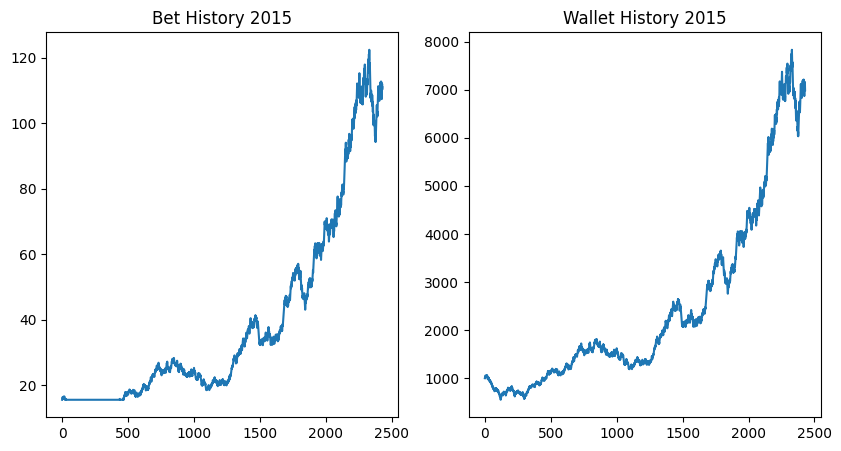

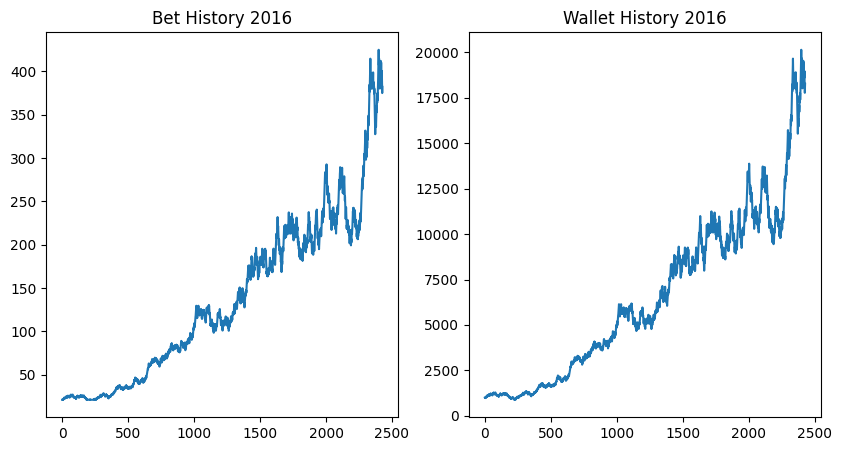

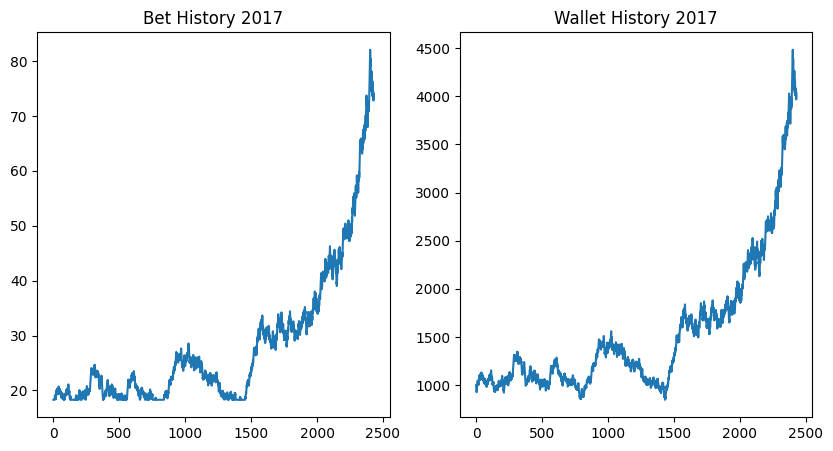

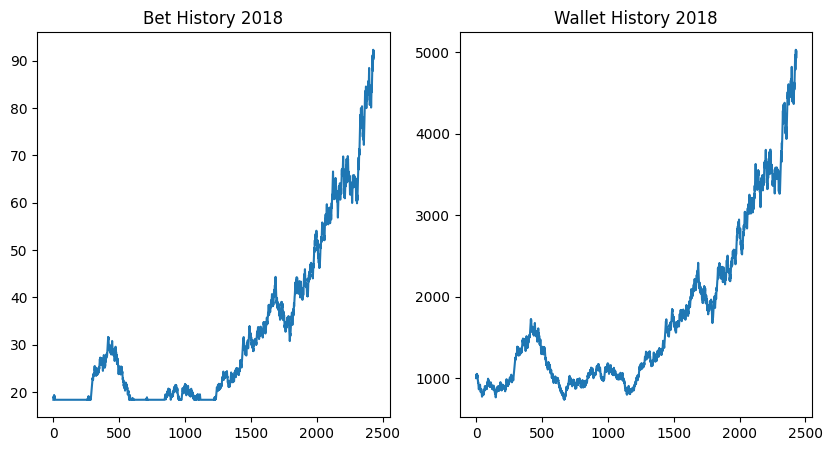

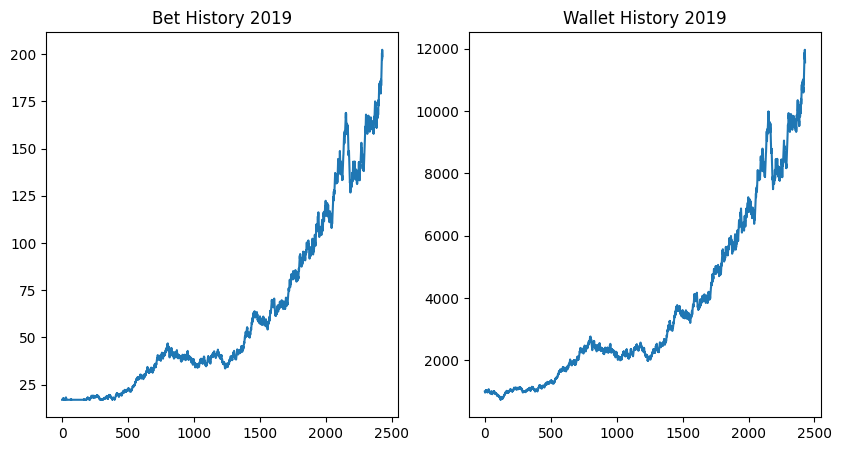

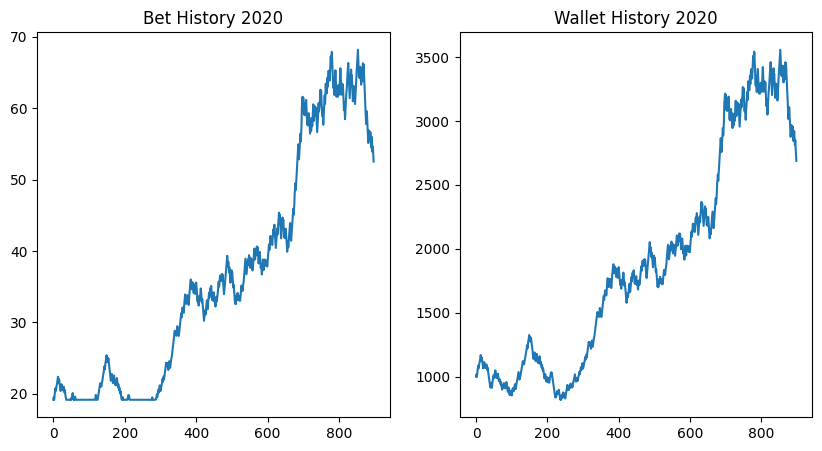

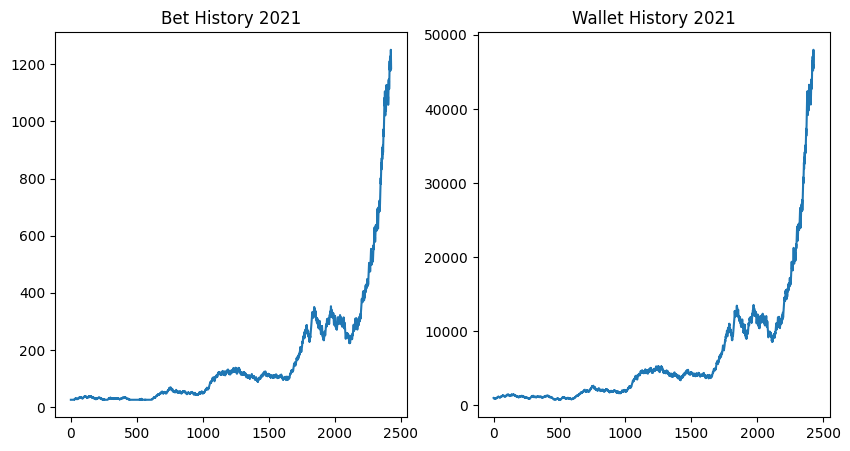

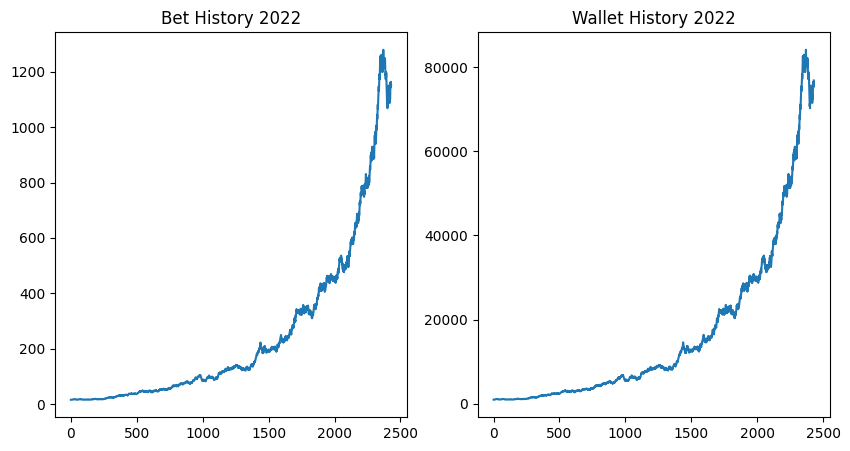

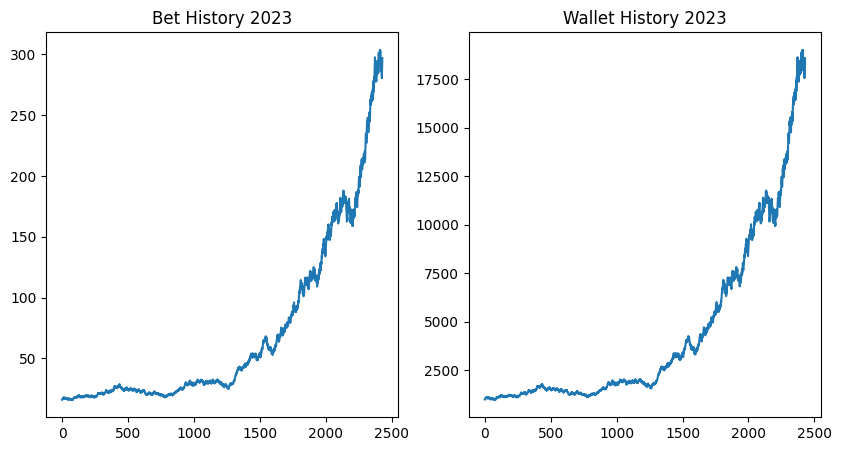

In [2]:

import pybaseball_v5_function_copy as main_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# Initialize a dictionary to store the results for each year
results = {}

# Iterate over the years
for year in range(2015, 2024):
    year_str = str(year)
    # Call the main function for the current year
    avg_class_report, avg_conf_matrix, bet_history, wallet_history = main_function.main_function(year_str)
    
    # Store the results in the dictionary
    results[year] = {
        'avg_class_report': avg_class_report,
        'avg_conf_matrix': avg_conf_matrix,
        'bet_history': bet_history,
        'wallet_history': wallet_history
    }

# Calculate the average of avg_class_report and avg_conf_matrix over all years
# Assuming avg_class_report and avg_conf_matrix are 2D arrays (matrices)
avg_class_report_all_years = np.mean([results[year]['avg_class_report'] for year in results], axis=0)
avg_conf_matrix_all_years = np.mean([results[year]['avg_conf_matrix'] for year in results], axis=0)

# Plot the data for each year
for year in results.keys():
    plt.figure(figsize=(10, 5))
    
    # Plot bet_history
    plt.subplot(1, 2, 1)
    plt.plot(results[year]['bet_history'])
    plt.title(f'Bet History {year}')
    
    # Plot wallet_history
    plt.subplot(1, 2, 2)
    plt.plot(results[year]['wallet_history'])
    plt.title(f'Wallet History {year}')
    
    plt.show()


In [13]:
results[year]['avg_class_report']

,precision,recall,f1-score,support
0,0.570214,0.537228,0.551458,1164.000000
1,0.596242,0.626382,0.609695,1266.000000
accuracy,0.583676,0.583676,0.583676,0.583676
macro avg,0.583228,0.581805,0.580576,2430.000000
weighted avg,0.583774,0.583676,0.581799,2430.000000


In [23]:
# Convert each year's avg_class_report to a DataFrame and use the implicit index
class_reports = [pd.DataFrame(results[year]['avg_class_report']) for year in results]

# Concatenate all DataFrames along the rows, ensuring that they align on the index
concatenated_reports = pd.concat(class_reports, axis=0)

# Group by the index (which is the implicit row labels) and calculate the mean
avg_class_report_all_years = concatenated_reports.groupby(concatenated_reports.index).mean()

print(avg_class_report_all_years)

              precision    recall  f1-score      support
0              0.558739  0.445803  0.489040  1053.333333
1              0.592698  0.692788  0.635646  1206.000000
accuracy       0.577932  0.577932  0.577932     0.577932
macro avg      0.575719  0.569295  0.562343  2259.333333
weighted avg   0.577153  0.577932  0.567583  2259.333333


In [30]:
# Print just the macro average in the precision column
# Since class_reports is a list of DataFrames, we need to access each DataFrame individually
for year in results.keys():
    # Print the macro average in the precision column for each year
    print(f"Macro average precision for {year}: ", results[year]['avg_class_report'].loc['macro avg', 'precision'])
    
    # Print the confusion matrix for each year
    print(f"Confusion matrix for {year}: \n", results[year]['avg_conf_matrix'])

# Print the average confusion matrix over all years
print("Average confusion matrix over all years: \n", avg_conf_matrix_all_years)


Macro average precision for 2015:  0.555291212645377
Confusion matrix for 2015: 
 [[406.66666667 707.33333333]
 [356.         959.        ]]
Macro average precision for 2016:  0.574392149588007
Confusion matrix for 2016: 
 [[439.33333333 701.66666667]
 [335.         952.        ]]
Macro average precision for 2017:  0.5539961447154221
Confusion matrix for 2017: 
 [[404.33333333 713.66666667]
 [353.33333333 958.66666667]]
Macro average precision for 2018:  0.5768186883392966
Confusion matrix for 2018: 
 [[397. 751.]
 [286. 997.]]
Macro average precision for 2019:  0.5856725628770746
Confusion matrix for 2019: 
 [[533.         610.        ]
 [393.66666667 892.33333333]]
Macro average precision for 2020:  0.5634816838575283
Confusion matrix for 2020: 
 [[202.33333333 195.66666667]
 [192.33333333 307.66666667]]
Macro average precision for 2021:  0.5854631000093736
Confusion matrix for 2021: 
 [[517.         603.        ]
 [395.33333333 913.66666667]]
Macro average precision for 2022:  0.603

In [8]:
# Convert each year's dictionary to a DataFrame and then calculate the mean
avg_class_report_all_years = pd.DataFrame([results[year]['avg_class_report'] for year in results]).mean()
avg_conf_matrix_all_years = pd.DataFrame([results[year]['avg_conf_matrix'] for year in results]).mean()

ValueError: Must pass 2-d input. shape=(9, 5, 4)

In [7]:

avg_class_report_all_years = pd.concat([results[year]['avg_class_report'] for year in results]).groupby(level=0).mean()
avg_conf_matrix_all_years = pd.concat([results[year]['avg_conf_matrix'] for year in results]).groupby(level=0).mean()

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [3]:
# # Get unique batter and pitcher ids from per_game_data
# batter_ids_per_game = per_game_data[batter_columns].values.flatten()
# pitcher_ids_per_game = per_game_data[pitcher_columns].values.flatten()

# # Check if these ids exist in the batter and pitcher data
# batter_ids_exist = batter_data['player_ID'].isin(batter_ids_per_game).any()
# pitcher_ids_exist = pitcher_data['player_ID'].isin(pitcher_ids_per_game).any()

# print(f"Do any batter ids in per_game_data exist in batter_data? {batter_ids_exist}")
# print(f"Do any pitcher ids in per_game_data exist in pitcher_data? {pitcher_ids_exist}")